In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

StrRt0.0001

In [71]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.0001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

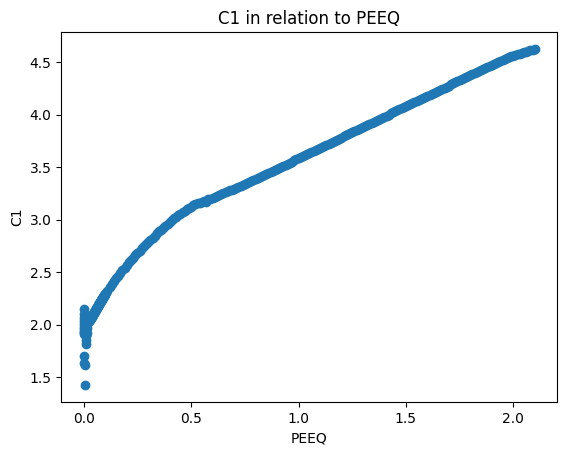

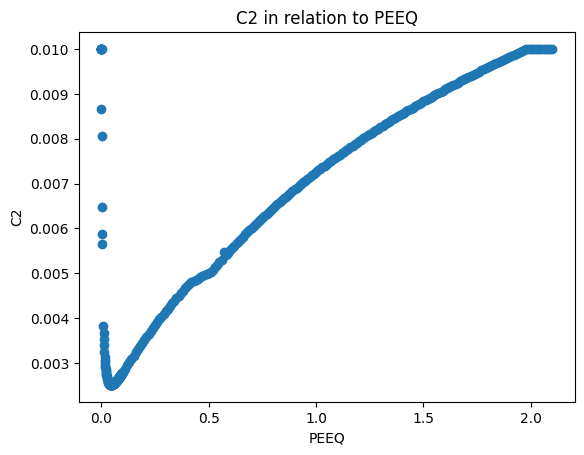

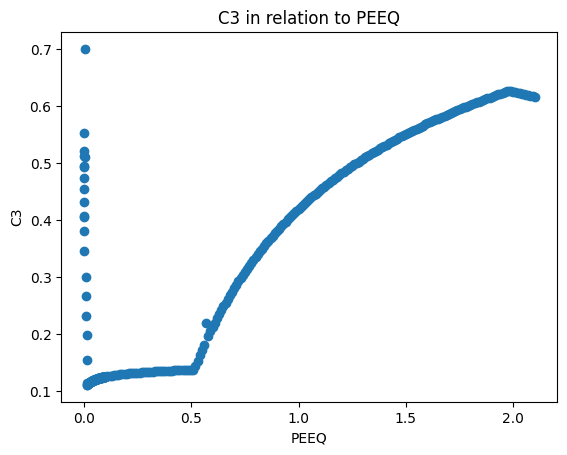

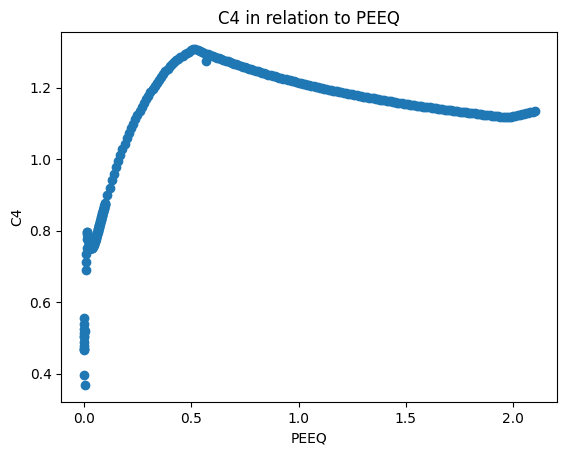

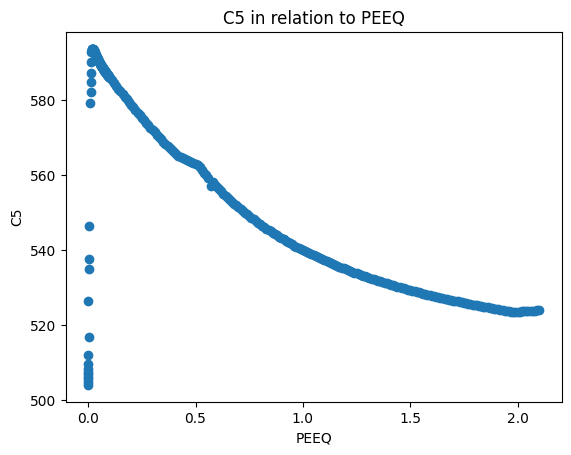

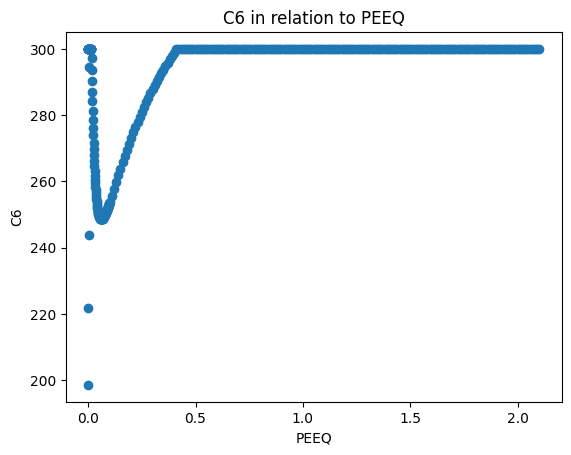

In [72]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column],'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()


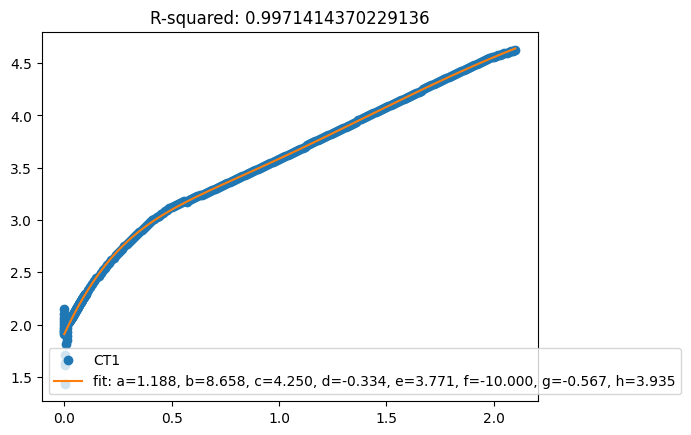

In [73]:
def cT1_func(s, a, b, c, d, e ,f, g, h):
    return np.exp(-a * s) + b / (1 + np.exp(-c * (s - d))) + e * s + f + g * s**2 + h * np.exp(-s)

df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
initial_guesses = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guesses, bounds=param_bounds, maxfev = 1000000)
[a, b, c, d, e, f, g ,h] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit



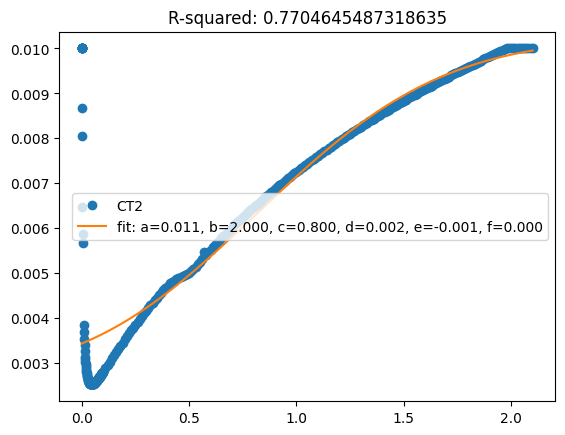

In [ ]:
#def cT2_func(s, a, b, c, d):
    #return a / (1 + np.exp(-b * (s - c))) + d

def cT2_func(s, a, b, c, d, e):
    return a / (1 + np.exp(-b * (s - c))) + d + e*s

cT2 = data["C2"].to_numpy()
initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
[a, b, c, d, e, f] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_17068\2958000766.py:2: RuntimeWarning: overflow encountered in exp
  return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g


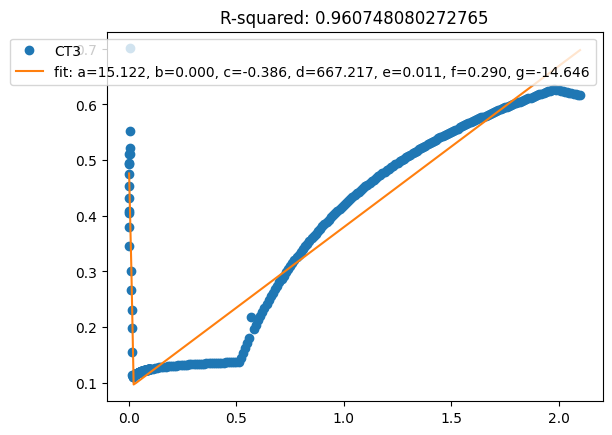

In [75]:
def cT3_func(s, a, b, c, d, e, f, g):
    return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g

cT3 = data["C3"].to_numpy()

params = curve_fit(cT3_func, PEEQ, cT3, p0=[65, 0.001, 0.6, 250, 0.02, -18, 0.12], maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

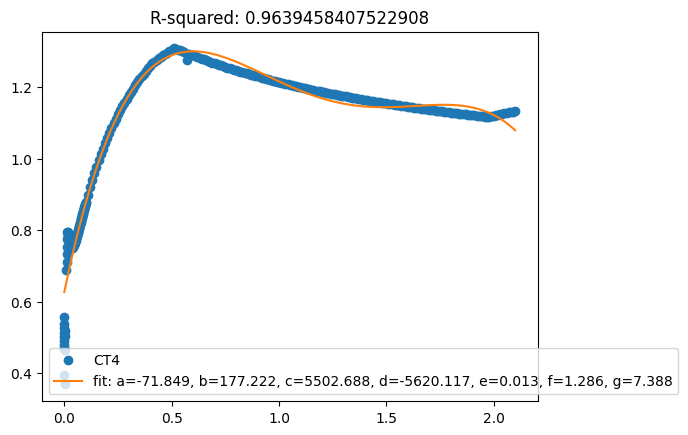

In [76]:
def cT4_func(s, a, b, c, d, e, f, g):
    return (a * s**2 + b * s + c) + (d * np.exp(-e * (s - f)**2)) + (g * s)

cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

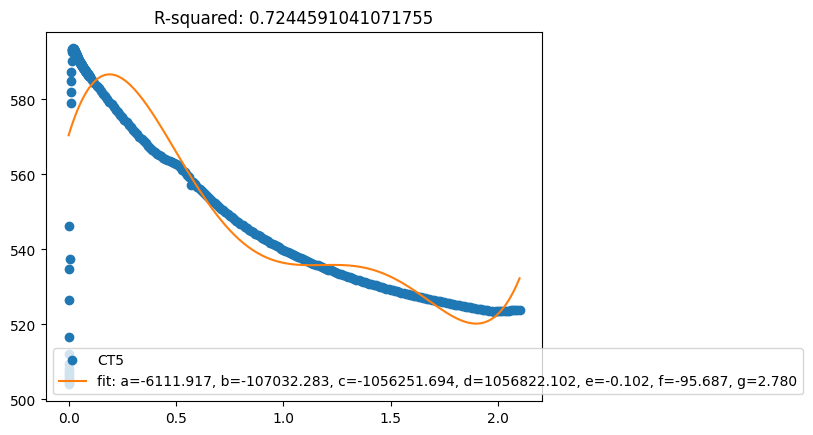

In [77]:
#def cT5_func(s, a, b, c):
    #return a * np.exp(-b * s) + c

#def cT5_func(s, a, b, c, d):
#    return a * np.exp(-b * s) + c + d * s**2

def cT5_func(s, a, b, c, d, e, f, g):
    return a * s**2 + b * s + c + d * np.exp(-e * s) + f * np.sin(g * s)

cT5 = data["C5"].to_numpy()
#initial_guess = [80, 0.5, 480, 0]
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_17068\4156807402.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)


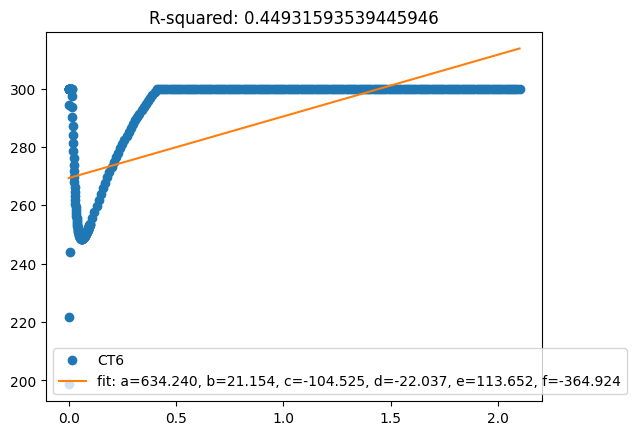

In [78]:
def cT6_func(s, a, b, c, d, e, f):
    return a + b * s + c * np.exp(-d * (s - e)) + f

cT6 = data["C6"].to_numpy()

params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)
[a, b, c, d, e, f] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [79]:
df_para_fit.to_csv('para_fit_results_0.0001.csv', index=False)

In [80]:
stress_data = pd.read_csv("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/Temperature_calibration/Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv")
fitted_para = pd.read_csv("para_fit_results_0.0001.csv")

C:\Users\meian\AppData\Local\Temp\ipykernel_17068\4013922025.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


[2.33219773 1.26455856 1.         1.32765637 1.4637548  1.43116091
 1.16800752]


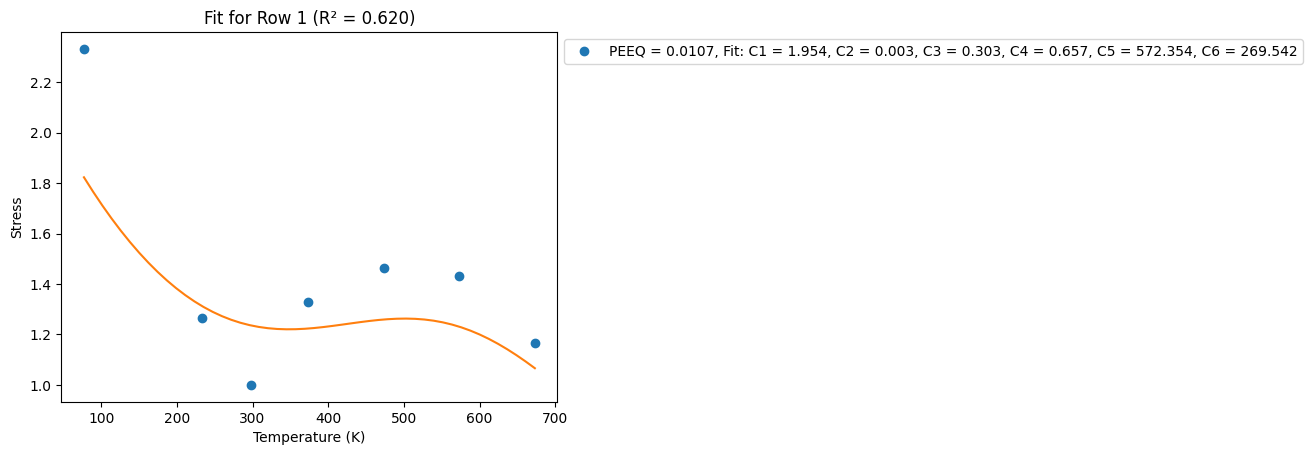

[1.88977535 1.04028073 1.         1.10573315 1.20809166 1.17370133
 0.99026645]


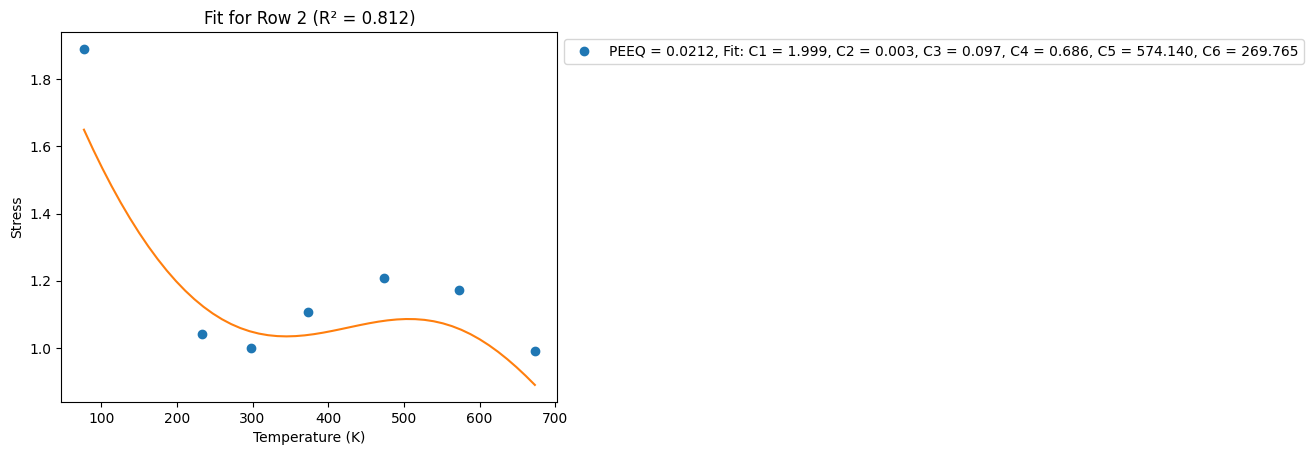

[1.75580815 0.98239076 1.         1.0486669  1.13967641 1.10277459
 0.94778786]


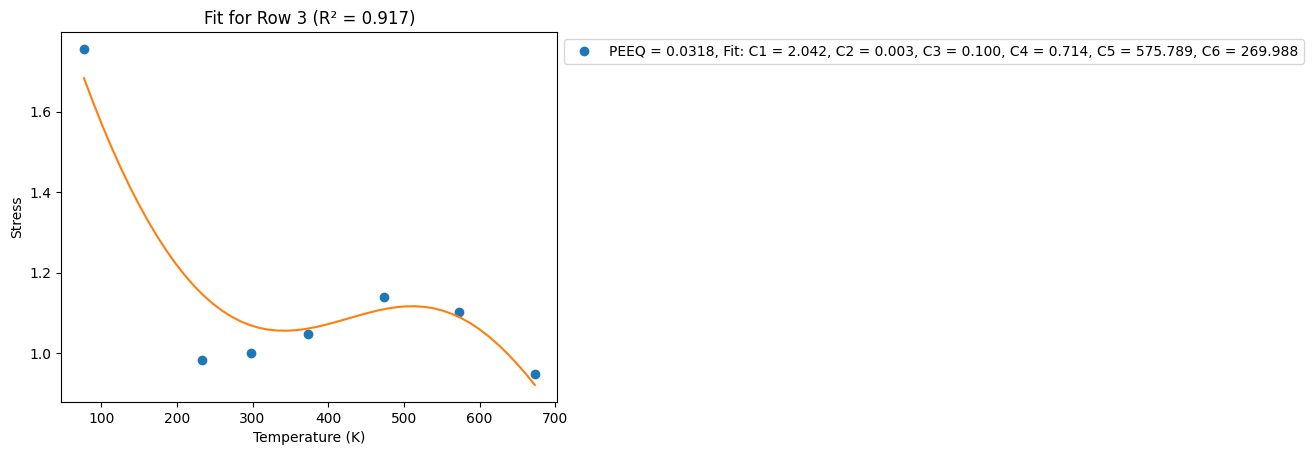

[1.70260576 0.96735308 1.         1.03210659 1.11772935 1.07936231
 0.93761111]


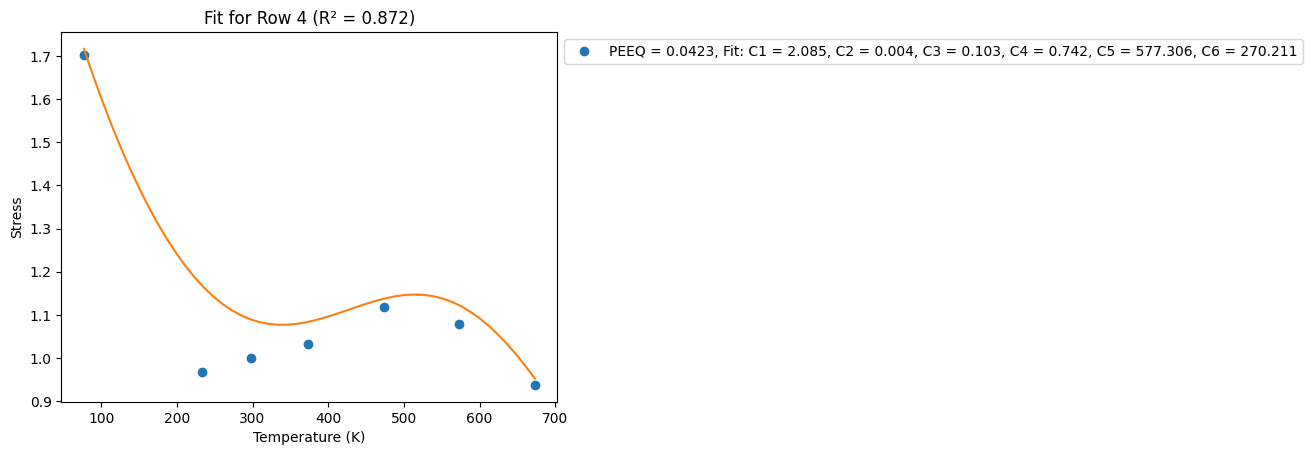

[1.67202446 0.9636772  1.         1.02517726 1.1071245  1.06828681
 0.93438411]


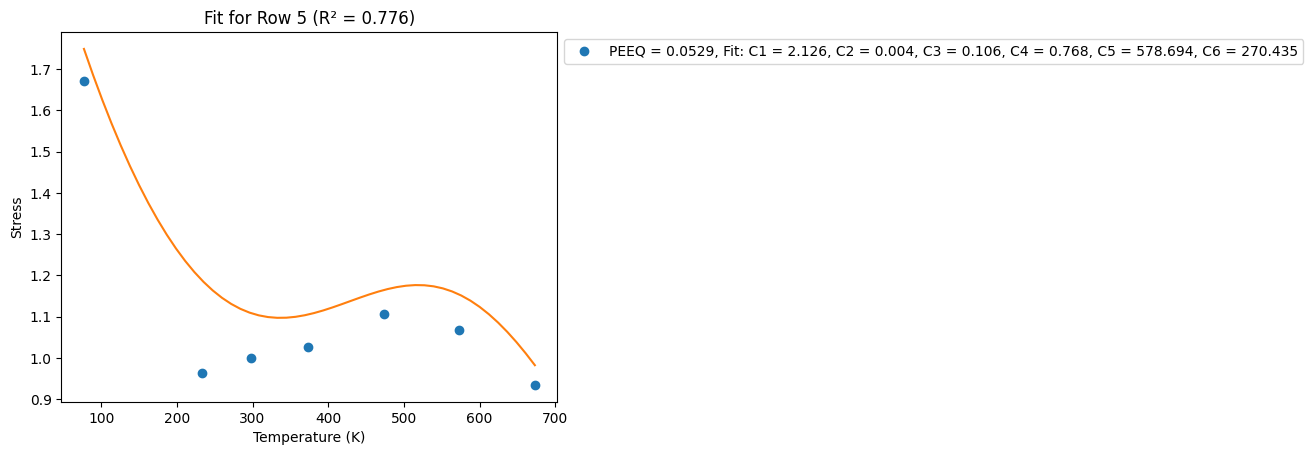

[1.64977962 0.96358756 1.         1.0207674  1.09970582 1.06107194
 0.93250779]


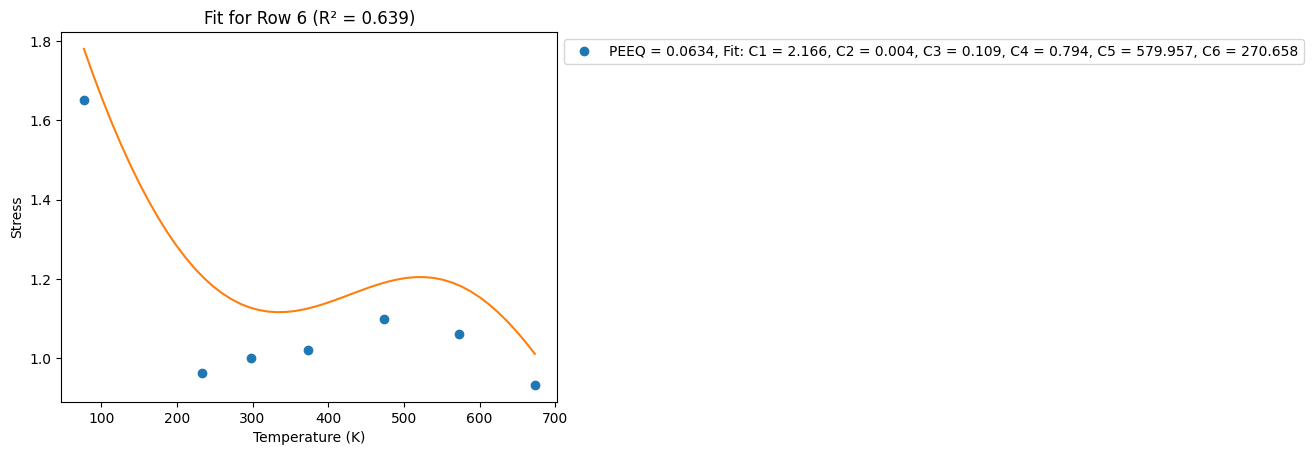

[1.59135519 0.97146423 1.         1.00816312 1.07818814 1.04261654
 0.92557132]


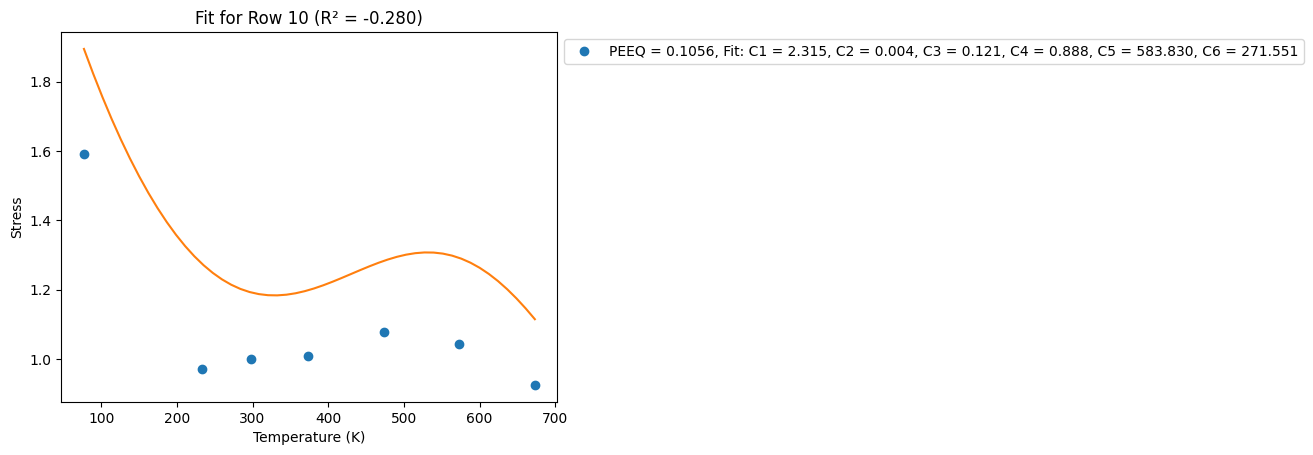

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


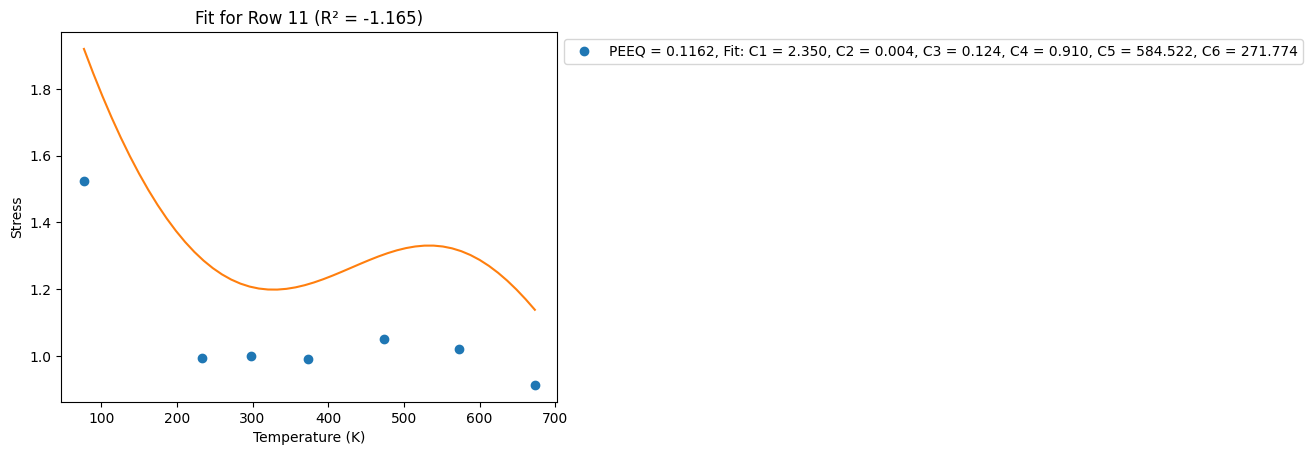

[1.46346827 1.02506208 1.         0.97694684 1.02940085 1.00337592
 0.90251418]


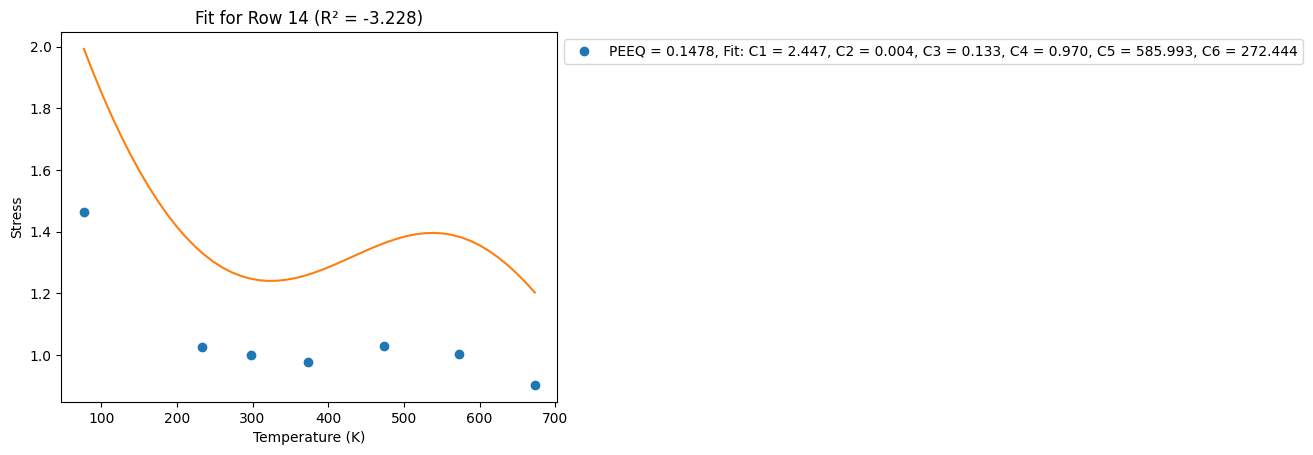

[1.43427297 1.03294434 1.         0.97719854 1.02511894 1.00856621
 0.90042063]


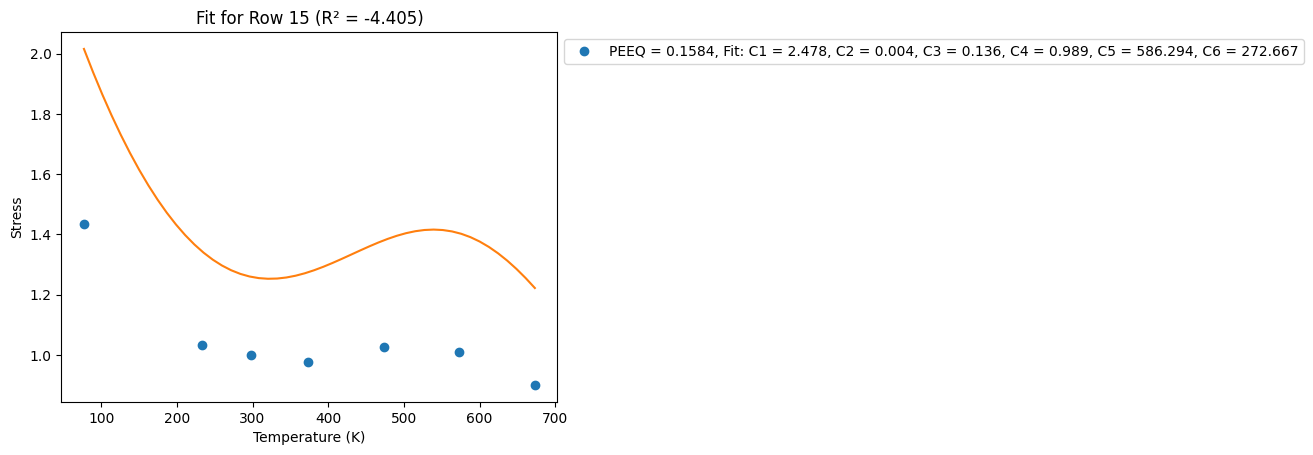

[1.42108056 1.03699166 1.         0.979791   1.02588198 1.01656784
 0.89993155]


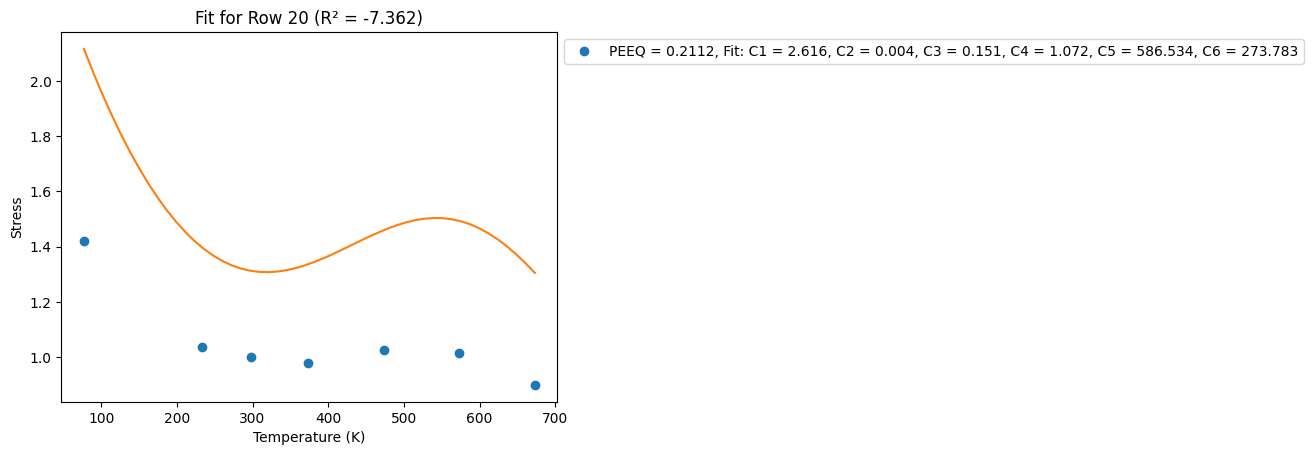

[1.41455959 1.04130102 1.         0.98175445 1.02752097 1.02333539
 0.89958156]


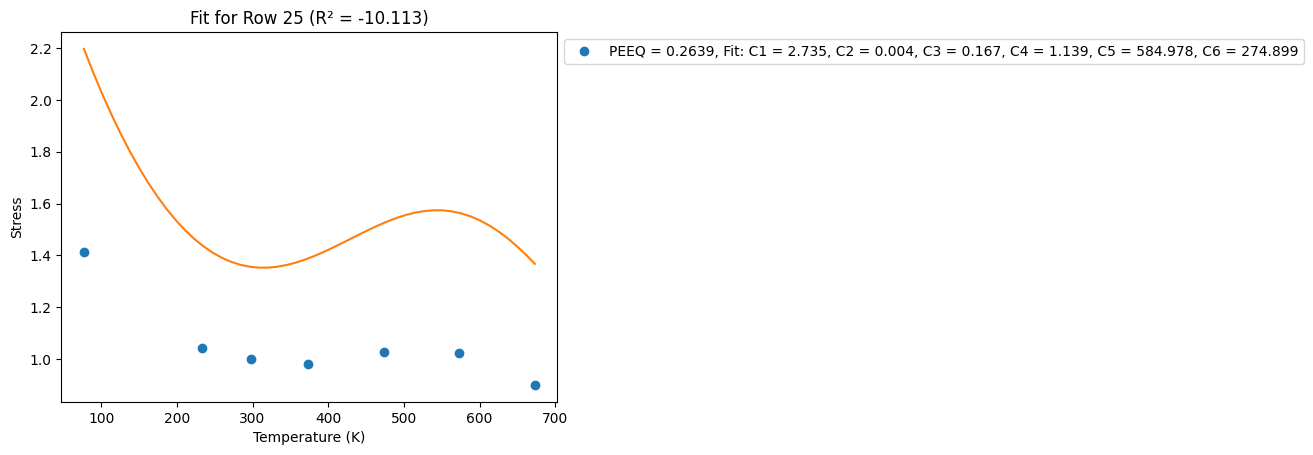

[1.41173245 1.04492866 1.         0.98310133 1.029308   1.02899767
 0.89941865]


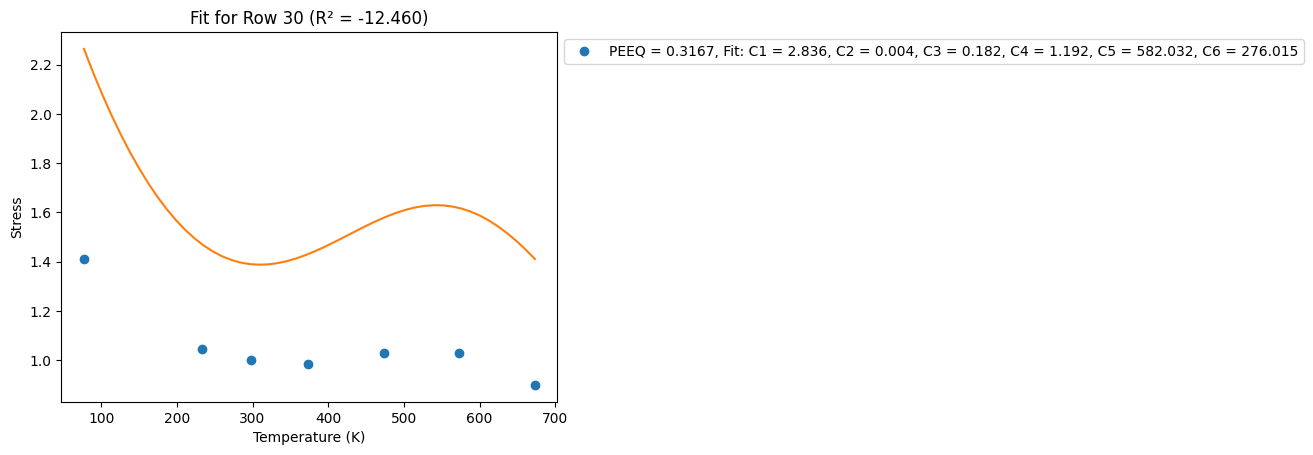

[1.4110547  1.04750822 1.         0.98407646 1.03105633 1.03384807
 0.89946539]


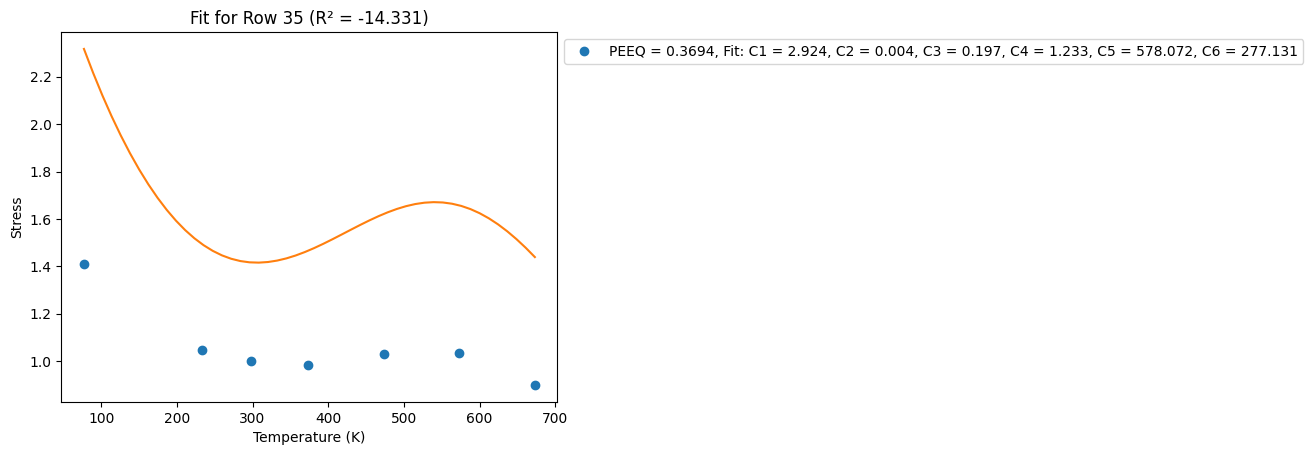

[1.4116733  1.04911386 1.         0.98485877 1.03271389 1.03809102
 0.89969087]


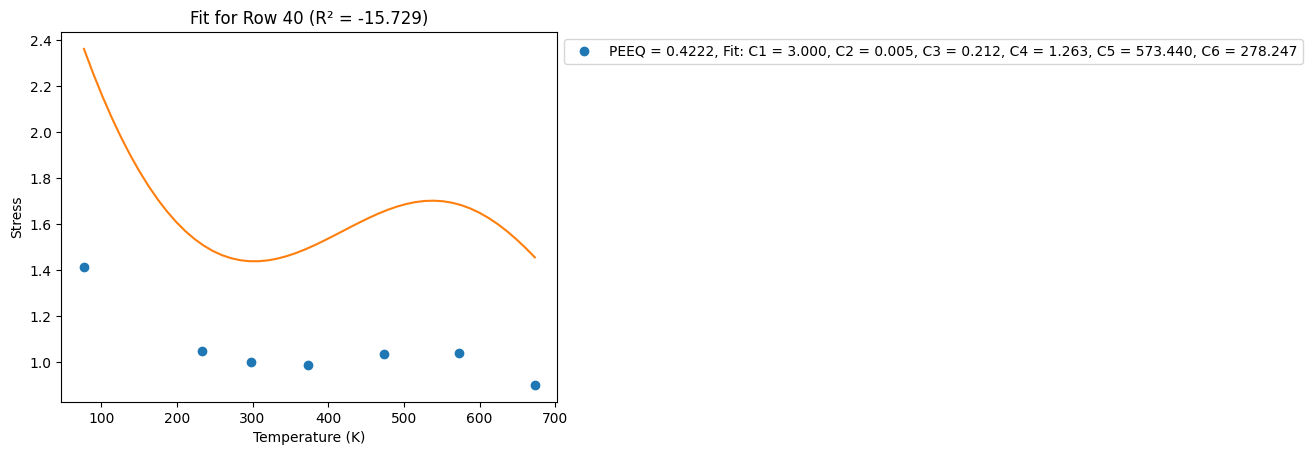

[1.41310172 1.04995285 1.         0.98555223 1.03426989 1.04186381
 0.90005065]


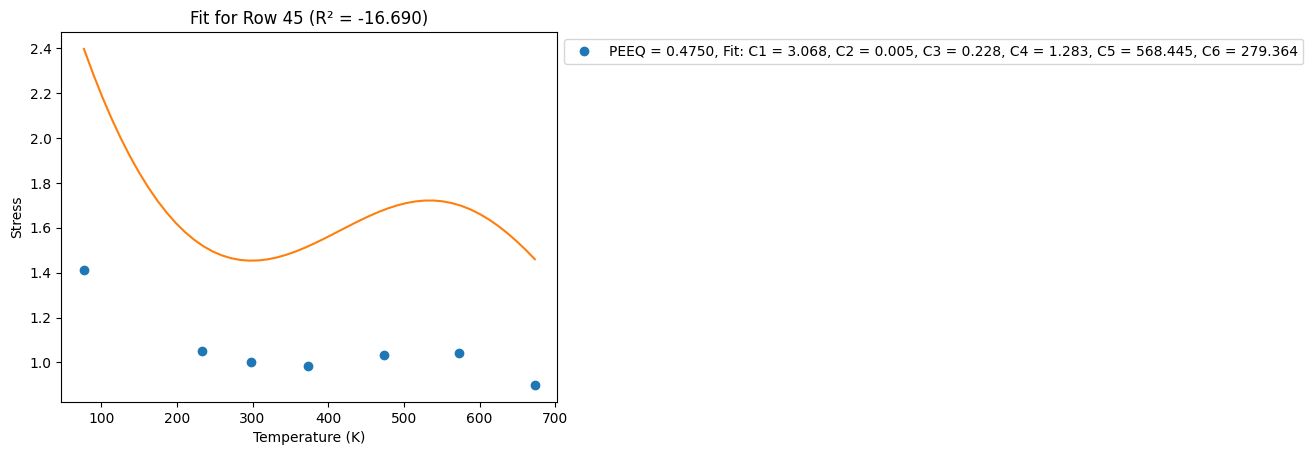

[1.41505132 1.05023056 1.         0.98621119 1.03572732 1.04526194
 0.90050489]


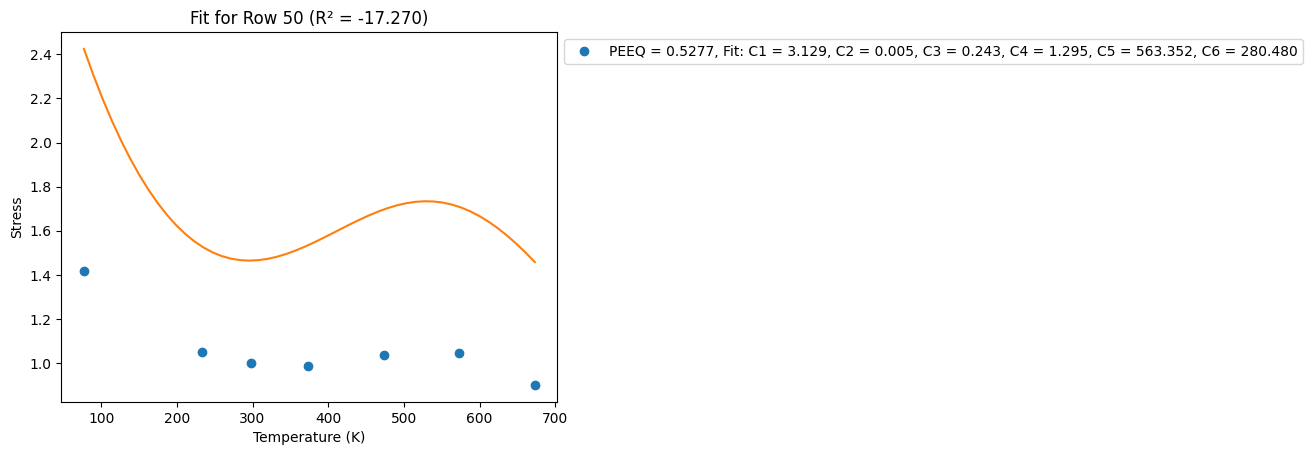

[1.44256922 1.04314139 1.         0.9927384  1.04648508 1.06812961
 0.90637621]


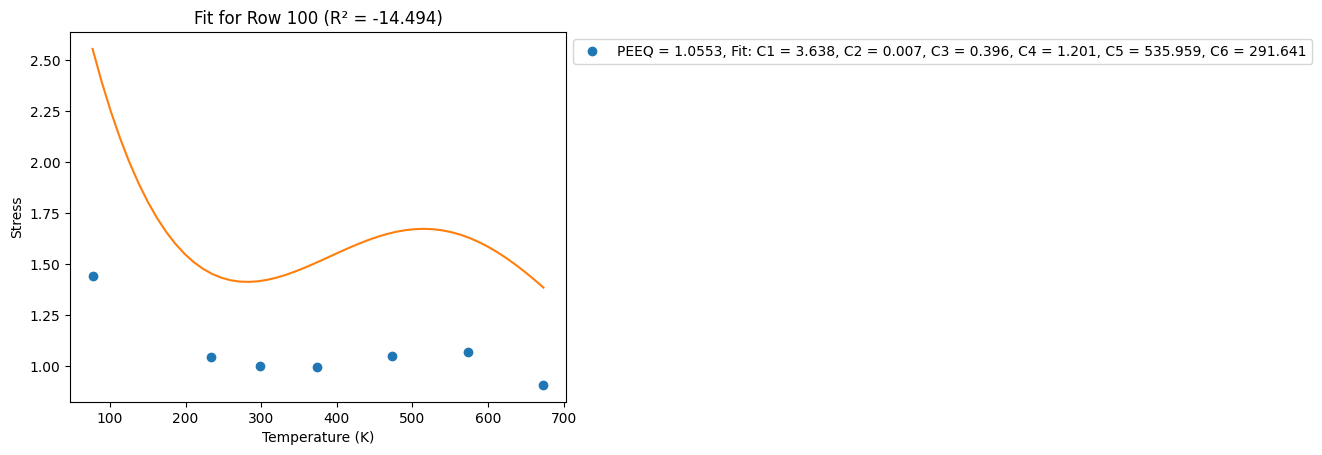

[1.72749803 0.98633134 1.         1.04207998 1.09039066 1.15053584
 0.95148916]


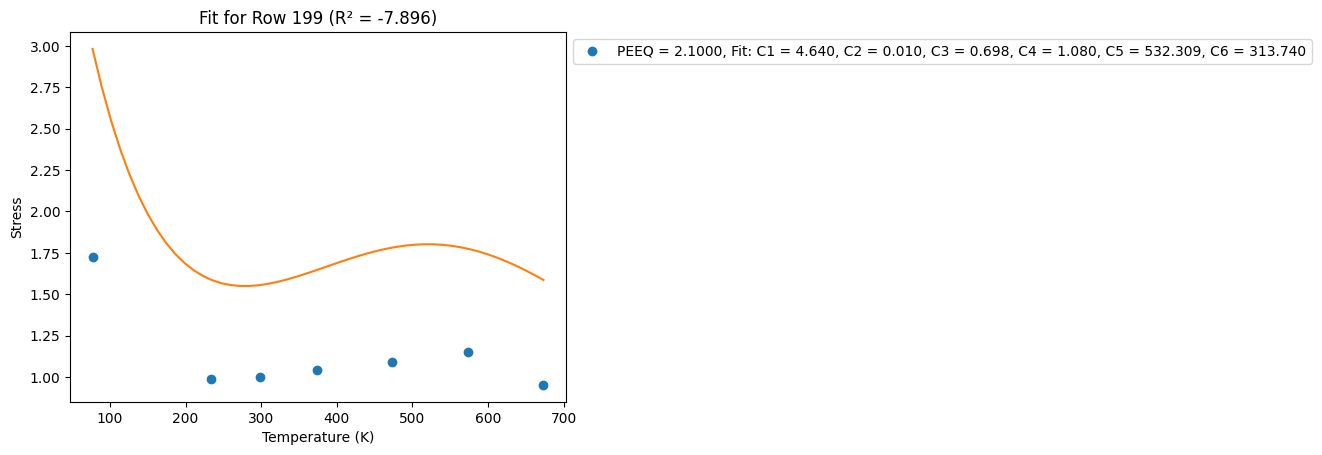

In [81]:
# Temperarute data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

StrRt 0.001

In [82]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

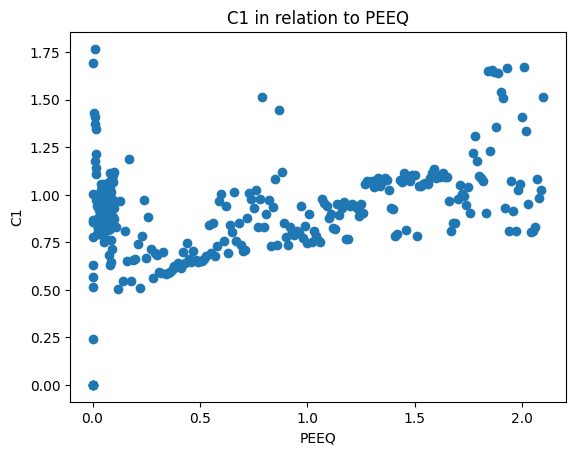

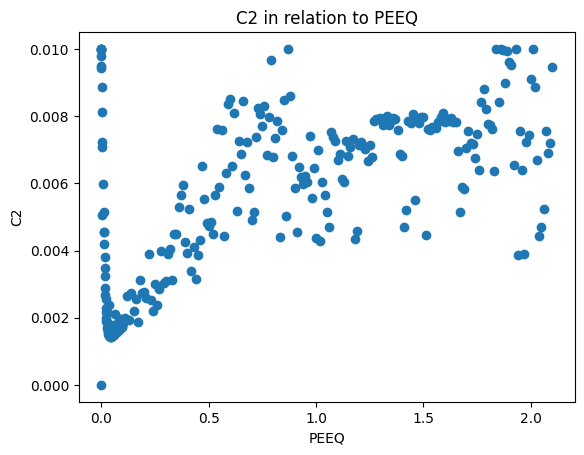

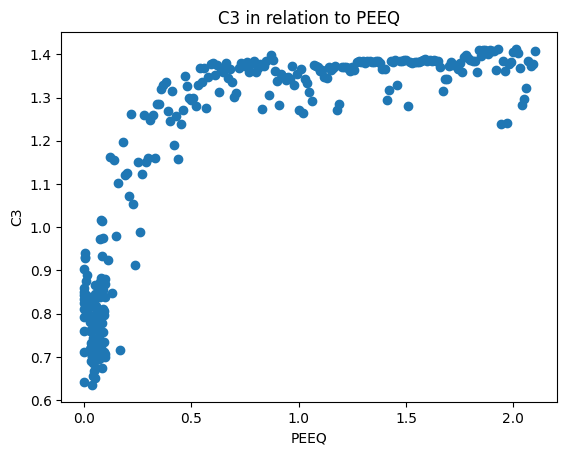

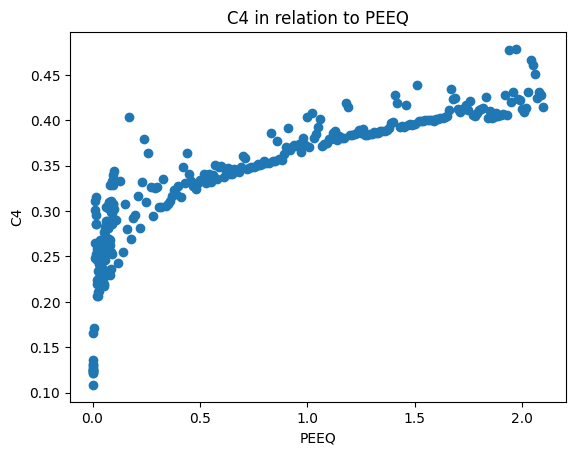

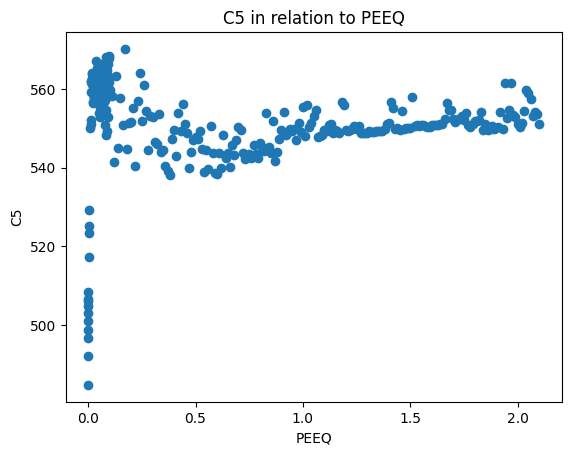

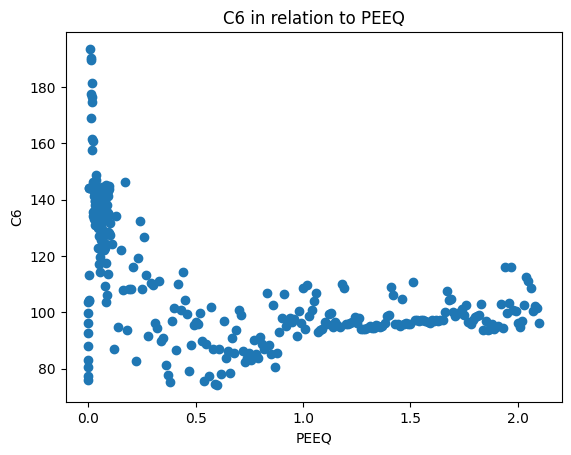

In [83]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column],'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()


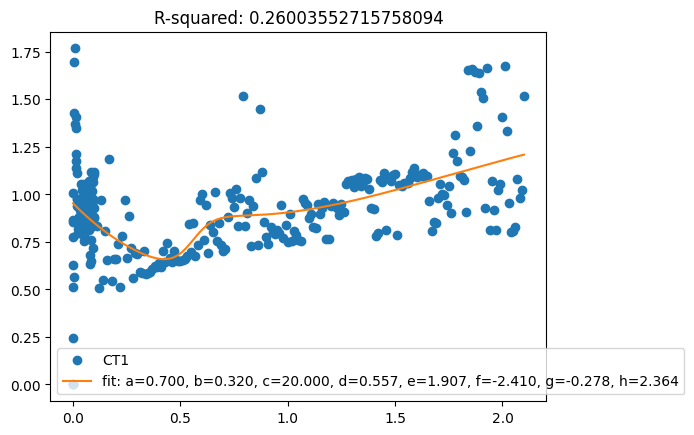

In [84]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
initial_guesses = [1.0, 1.0, 5.0, 1.0, 0.5, 1.0, 0.1, 1.0]
param_bounds = ([0.1, -10, 0.1, -5, -5, -5, -5, -10],
                [5, 10, 20, 5, 5, 5, 5, 10])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guesses, bounds=param_bounds, maxfev = 1000000)
[a, b, c, d, e, f, g ,h] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

In [85]:
cT2 = data["C2"].to_numpy()
initial_guess = [6.0, 18.0, 0.4, -6.0]
bounds = ([0, 0, -1, -10], [10, 30, 1, 0]) 

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT2 - cT2_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

TypeError: cT2_func() missing 2 required positional arguments: 'e' and 'f'

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\2958000766.py:2: RuntimeWarning: overflow encountered in exp
  return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g


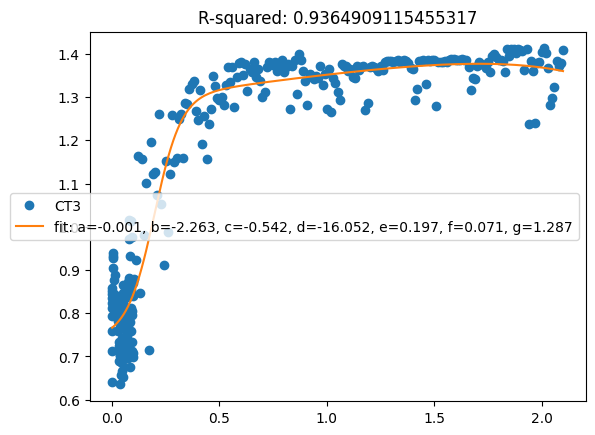

In [ ]:
cT3 = data["C3"].to_numpy()

params = curve_fit(cT3_func, PEEQ, cT3, p0=[65, 0.001, 0.6, 250, 0.02, -18, 0.12], maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

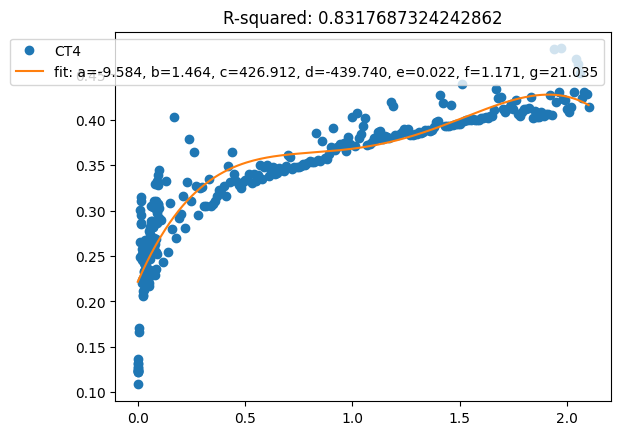

In [ ]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

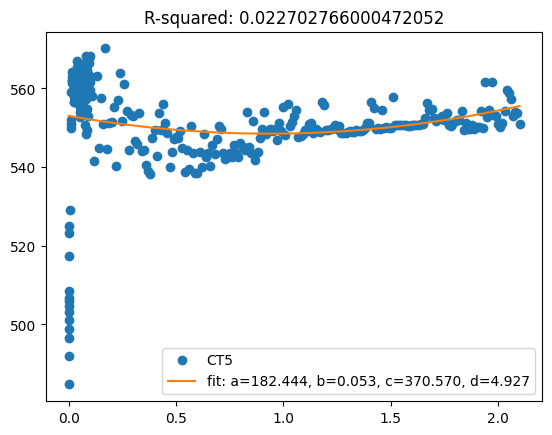

In [ ]:
cT5 = data["C5"].to_numpy()
initial_guess = [80, 0.5, 480, 0]

params = curve_fit(cT5_func, PEEQ, cT5,p0= initial_guess, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\1665829902.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)


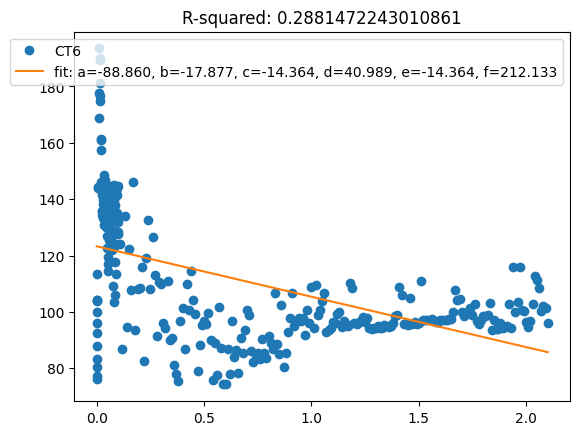

In [ ]:
cT6 = data["C6"].to_numpy()

params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)
[a, b, c, d, e, f] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [ ]:
df_para_fit.to_csv('para_fit_results_0.001.csv', index=False)

In [ ]:
stress_data = pd.read_csv("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/Temperature_calibration/Fitted_FC_TmpDpn_RD_StrRt0.001_ref.csv")
fitted_para = pd.read_csv("para_fit_results_0.001.csv")

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\1321266686.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


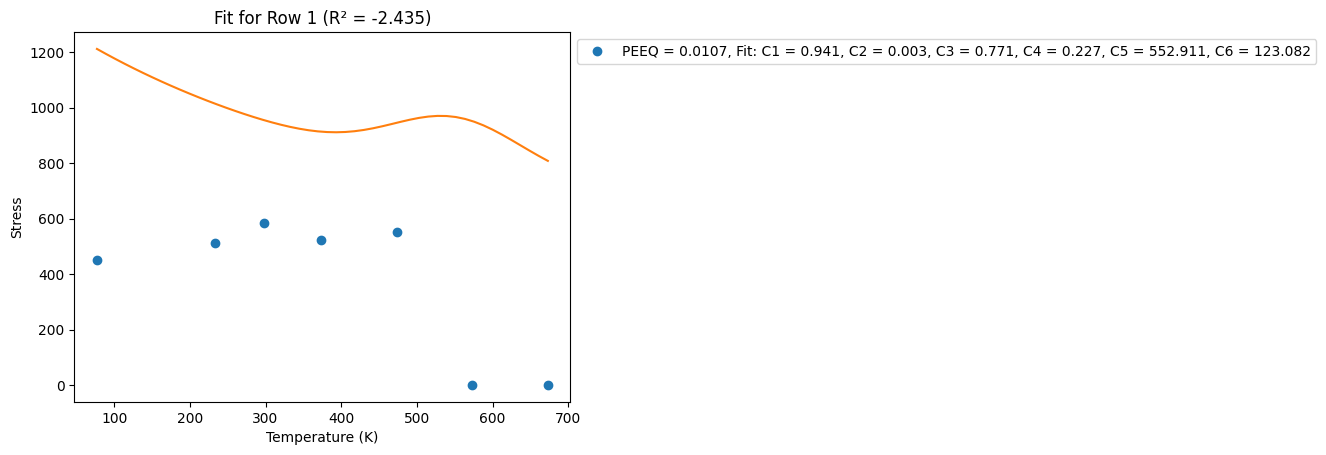

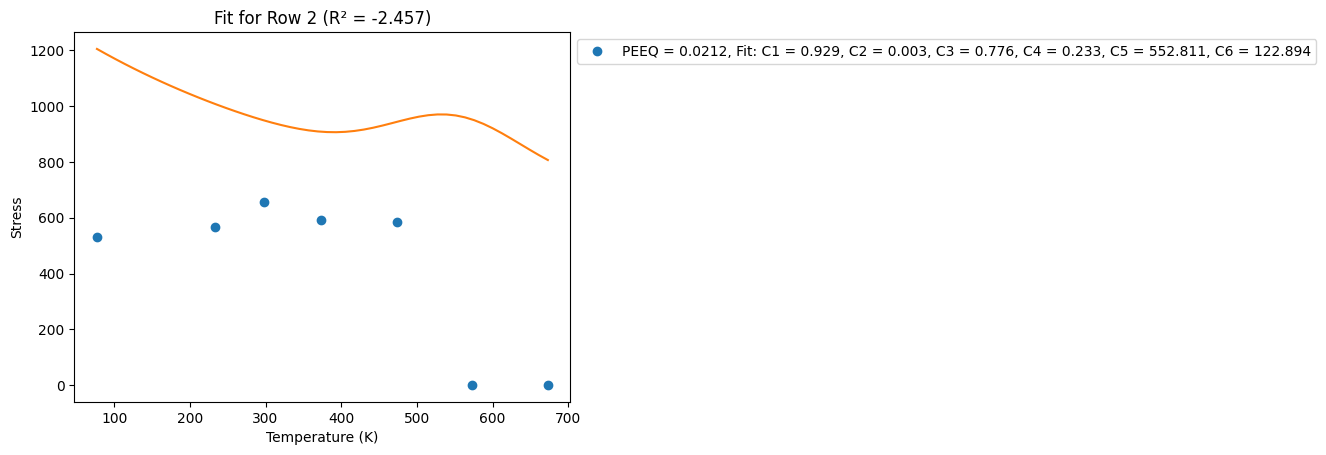

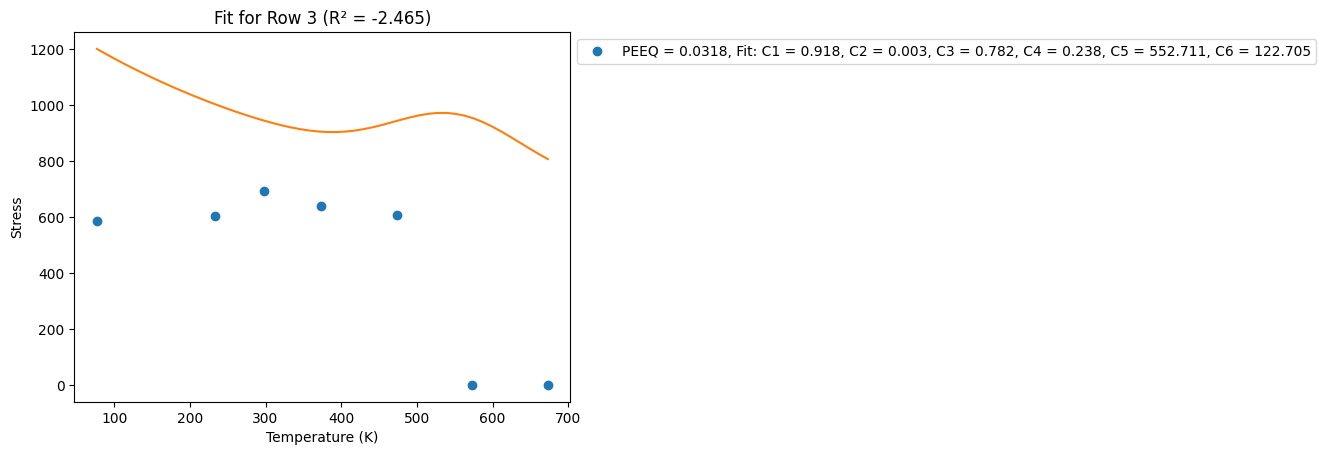

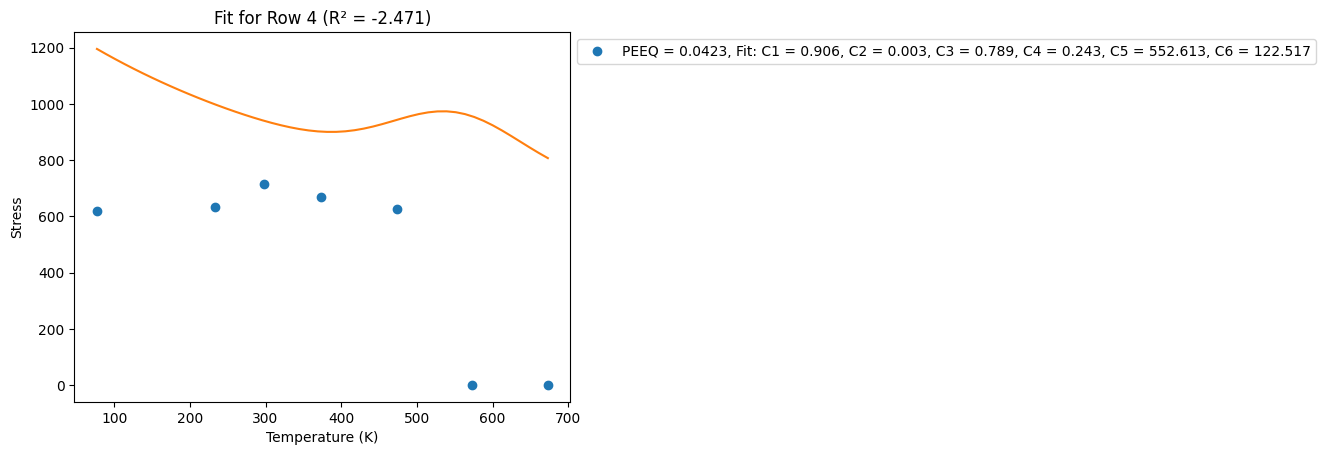

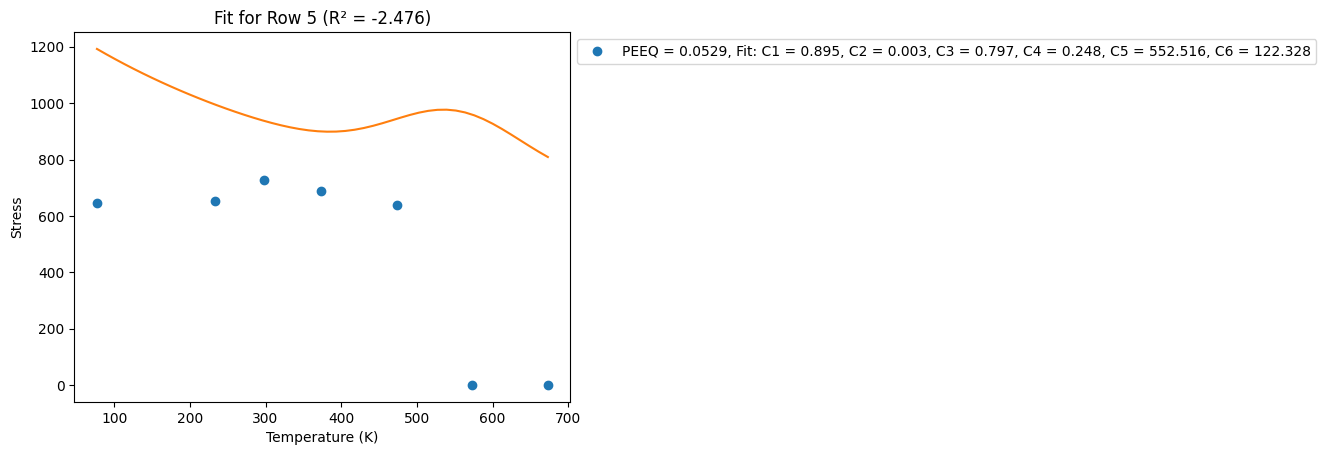

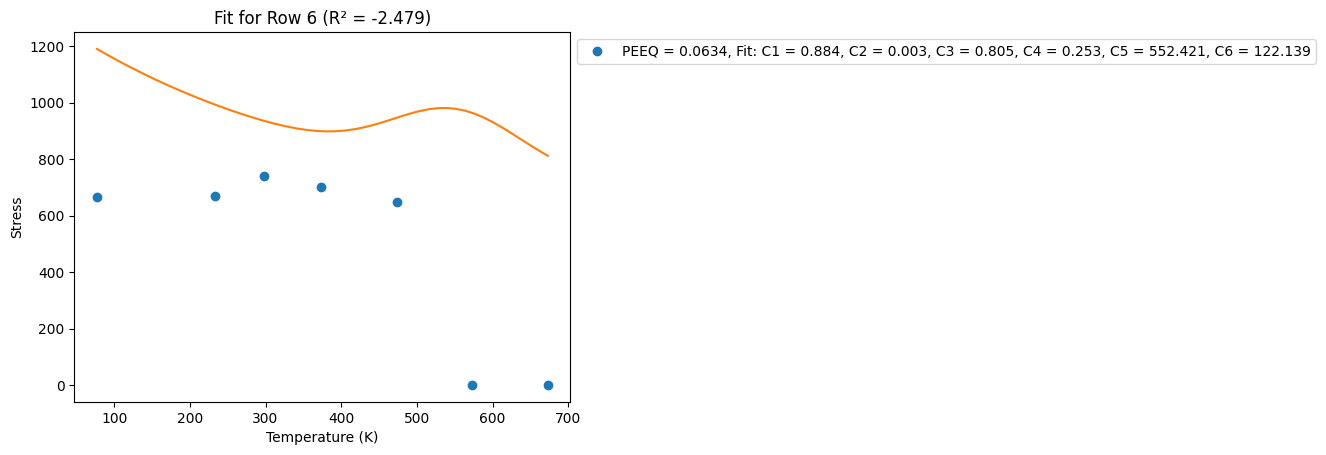

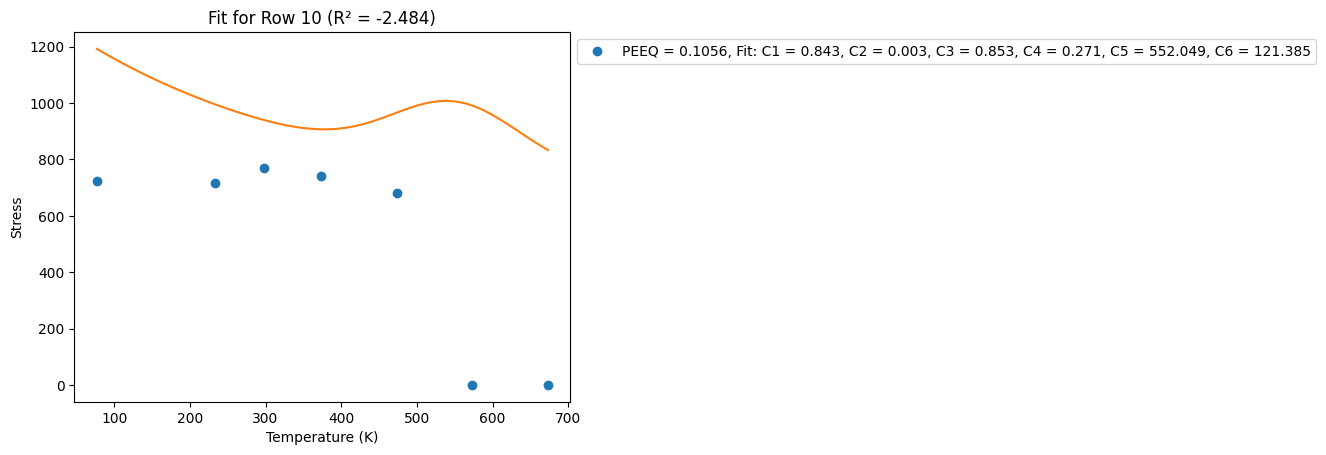

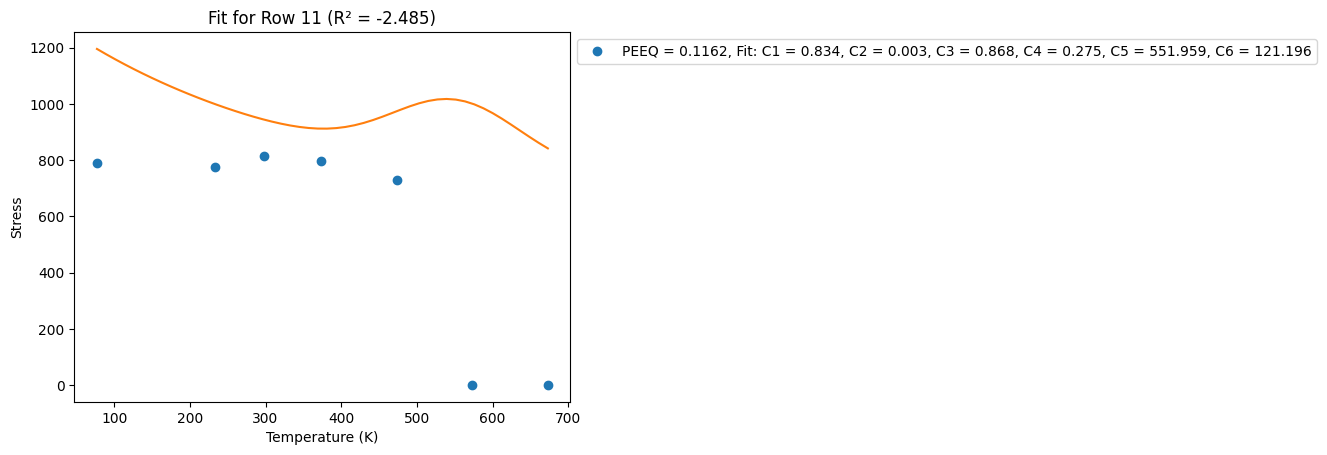

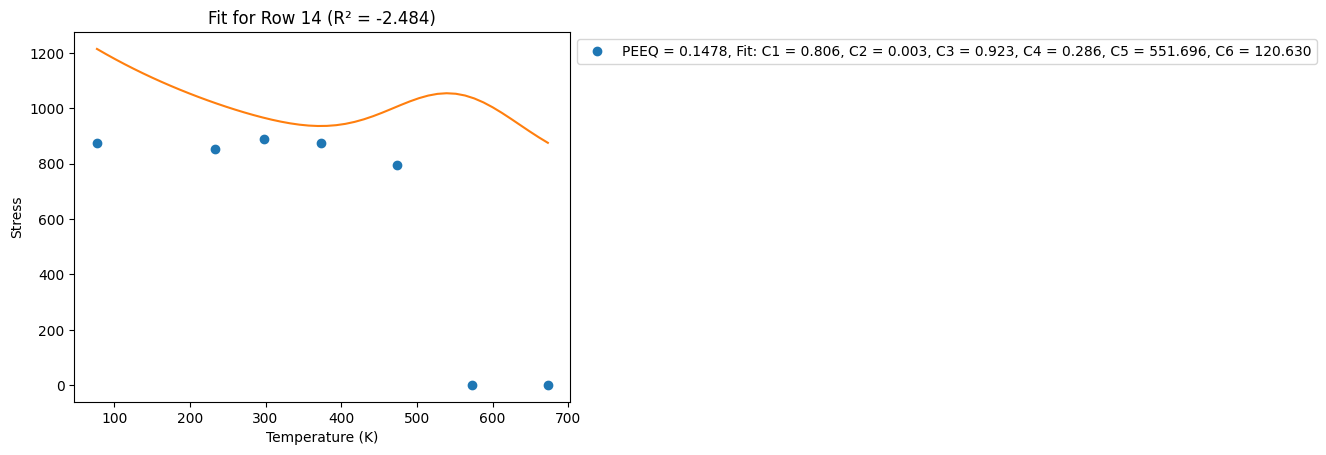

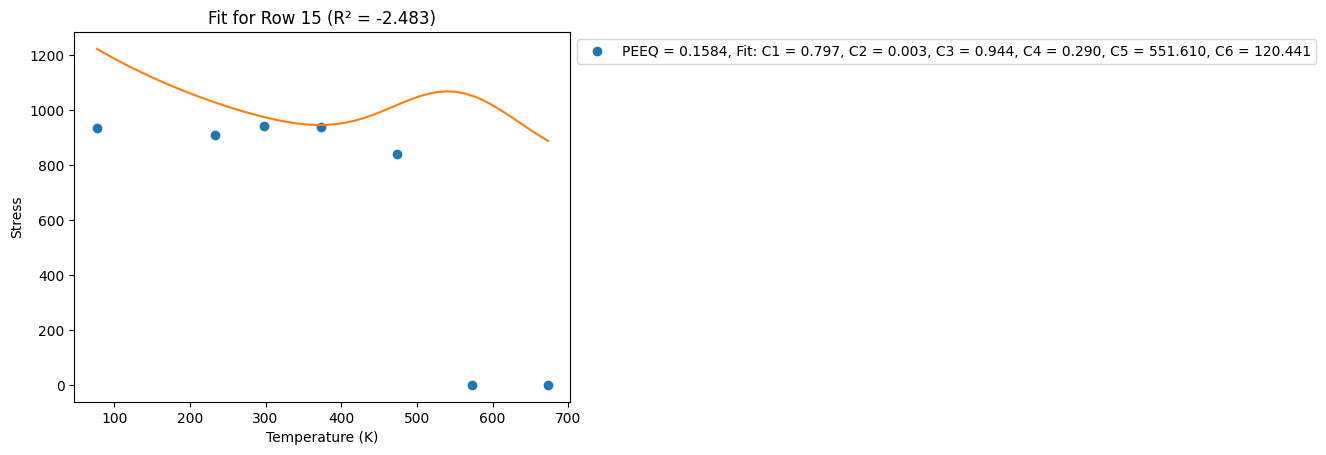

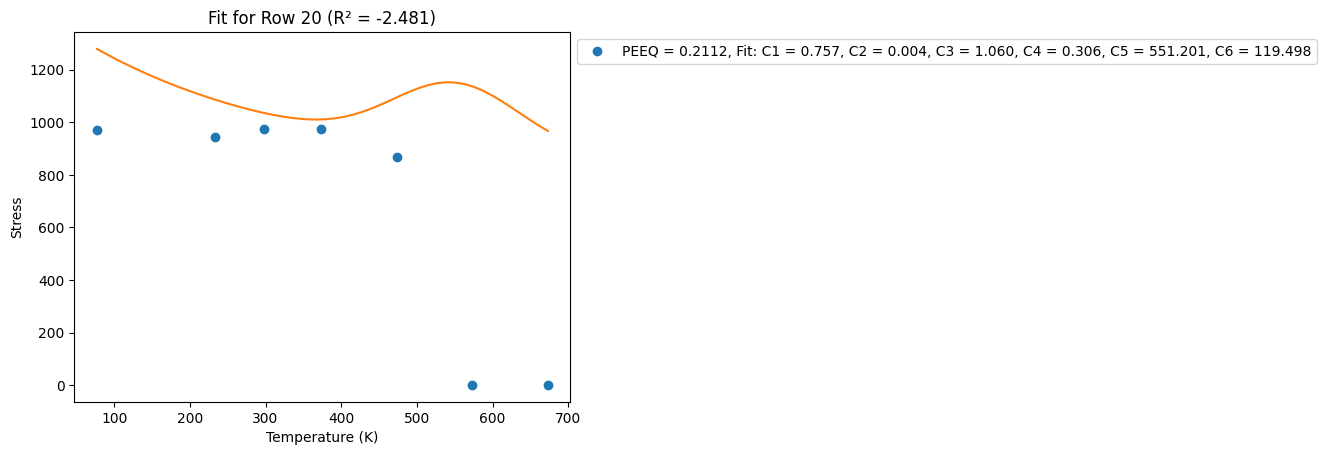

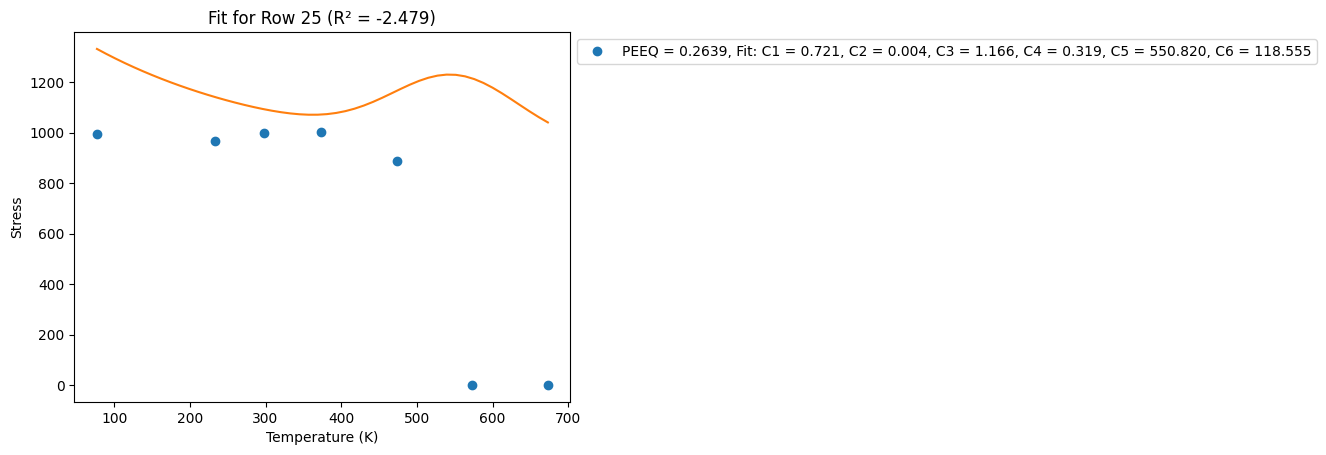

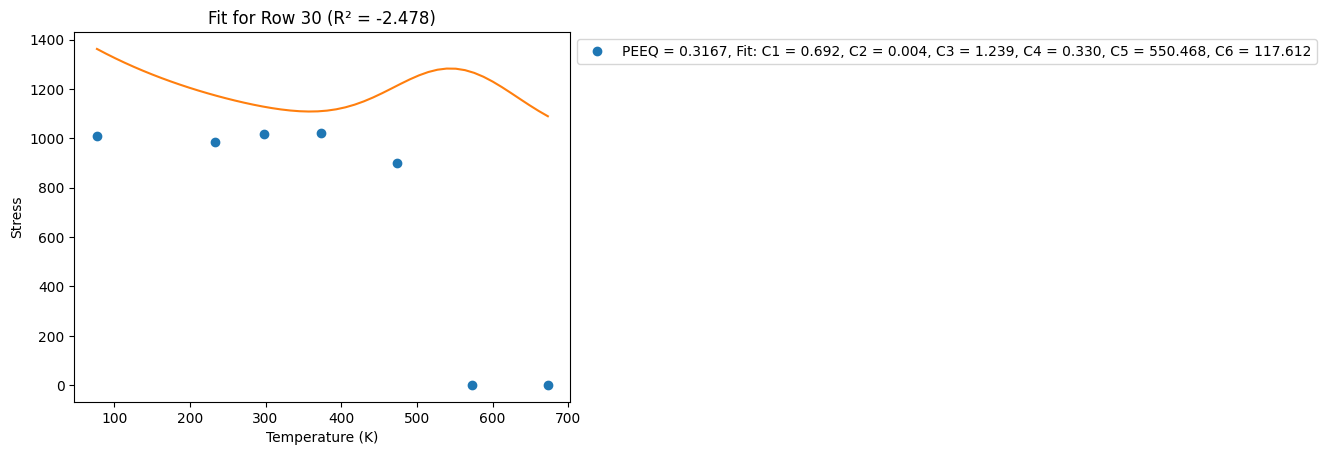

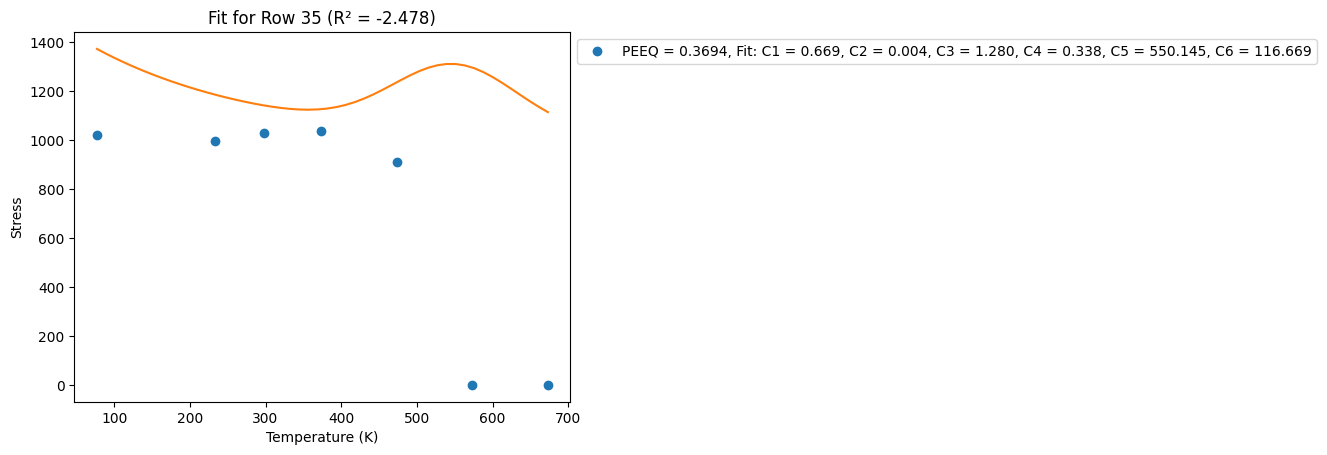

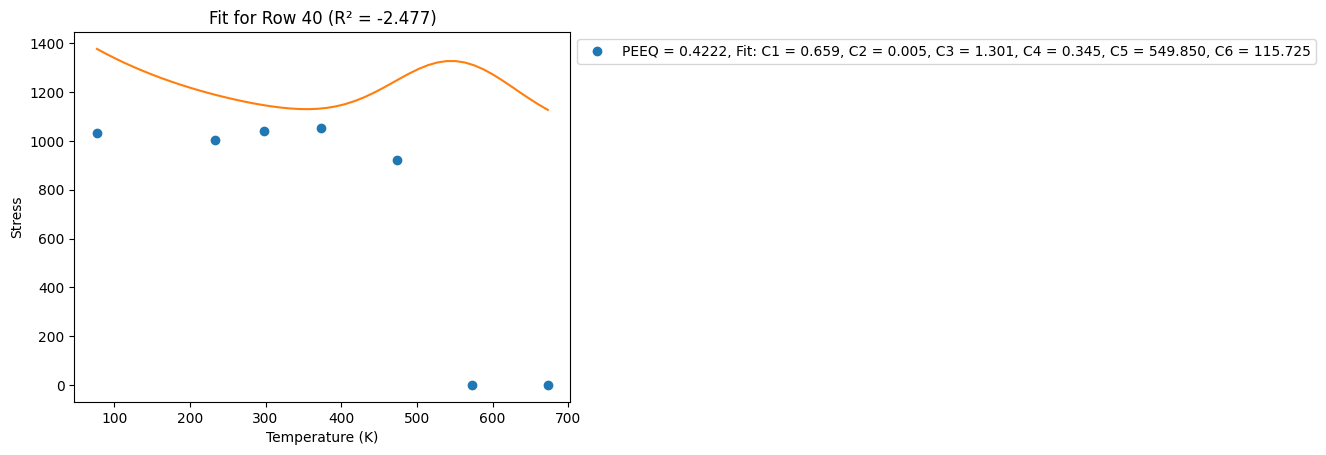

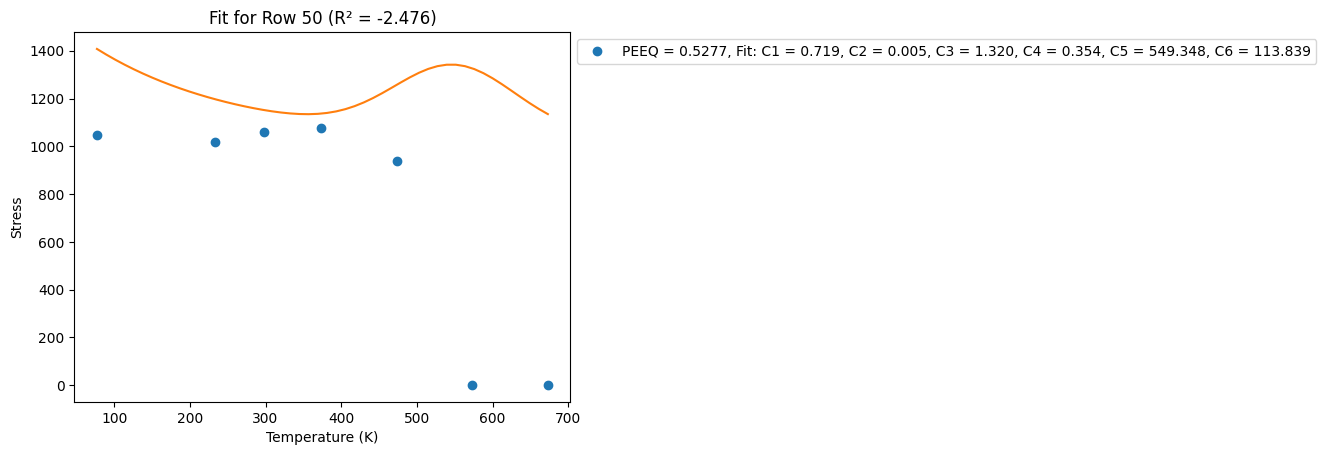

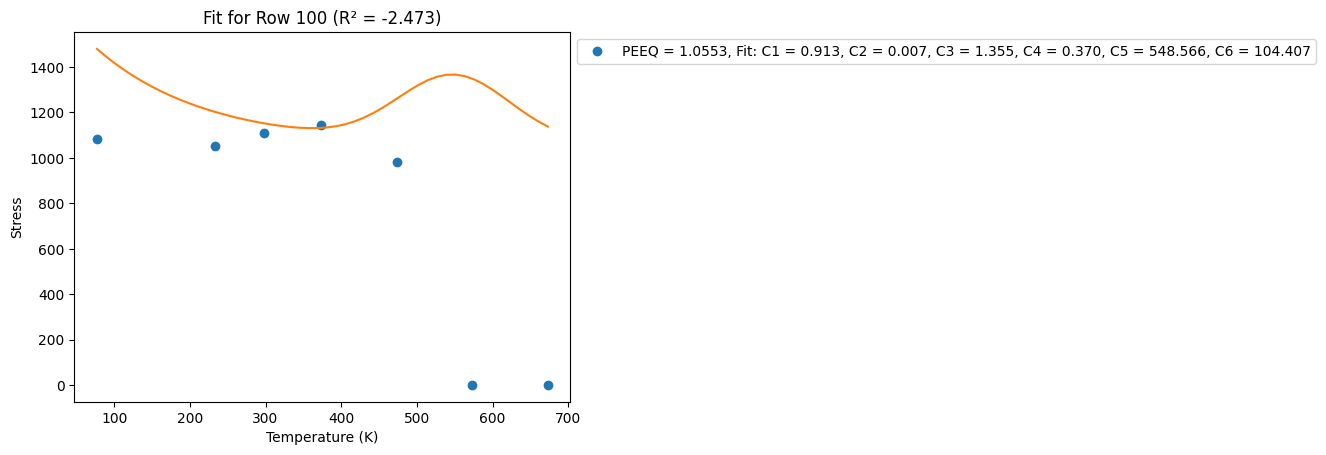

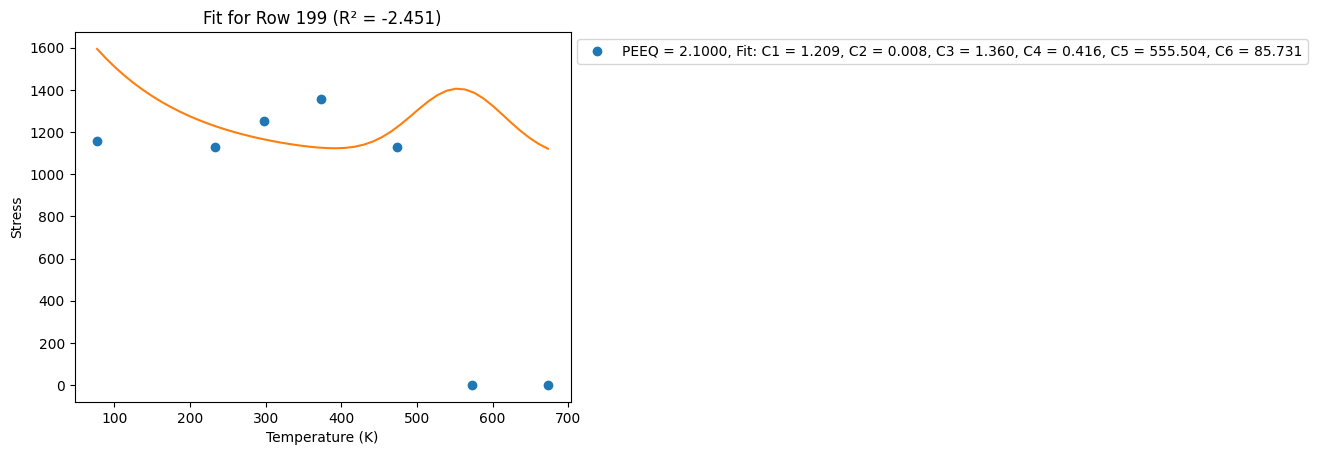

In [ ]:
for j, i in enumerate(np.array([1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Str0.01

In [ ]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.01.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

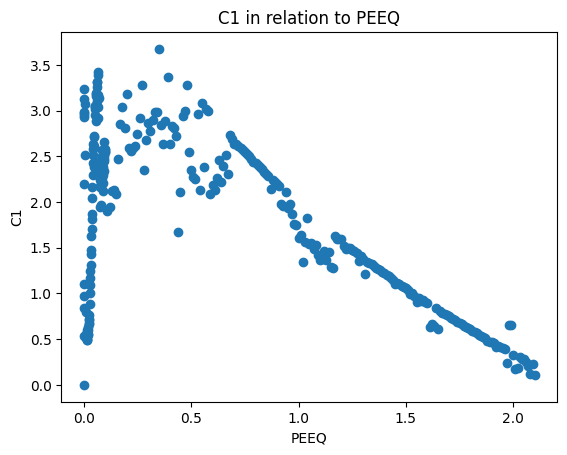

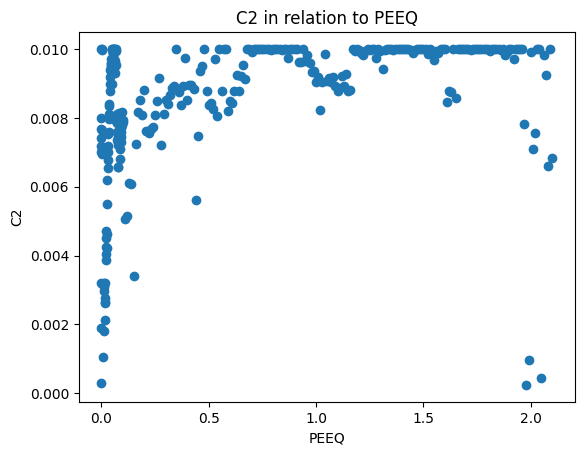

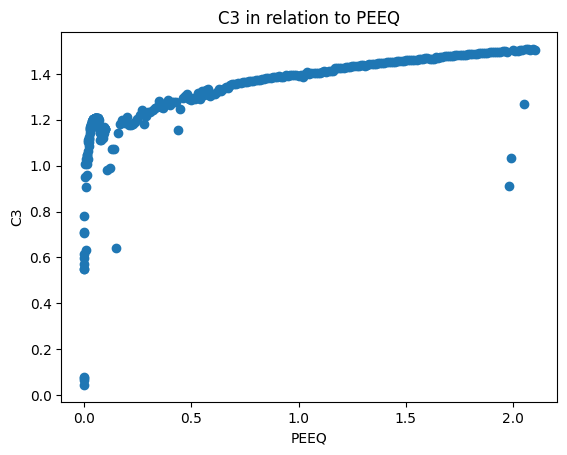

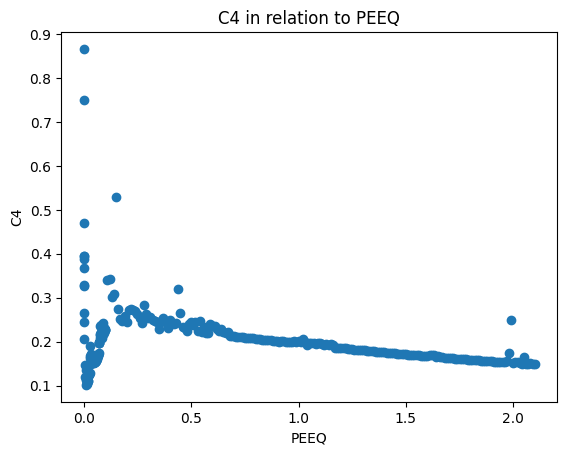

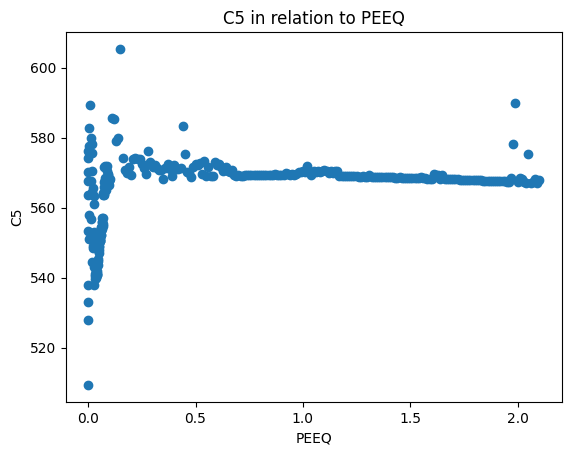

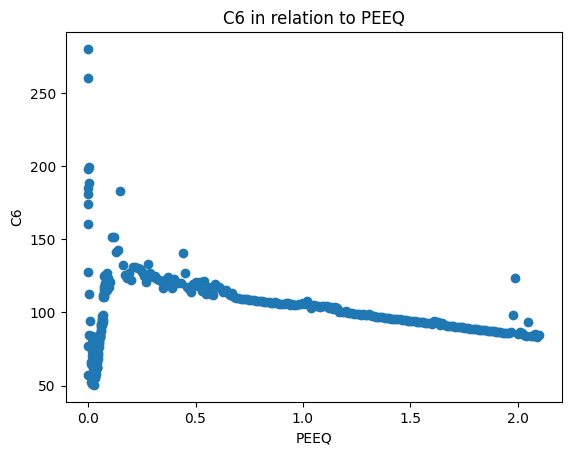

In [ ]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column],'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()


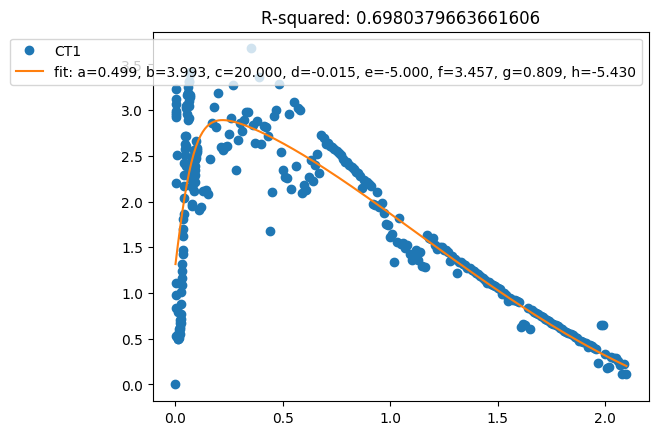

In [ ]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
initial_guesses = [1.0, 1.0, 5.0, 1.0, 0.5, 1.0, 0.1, 1.0]
param_bounds = ([0.1, -10, 0.1, -5, -5, -5, -5, -10],
                [5, 10, 20, 5, 5, 5, 5, 10])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guesses, bounds=param_bounds, maxfev = 1000000)
[a, b, c, d, e, f, g ,h] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

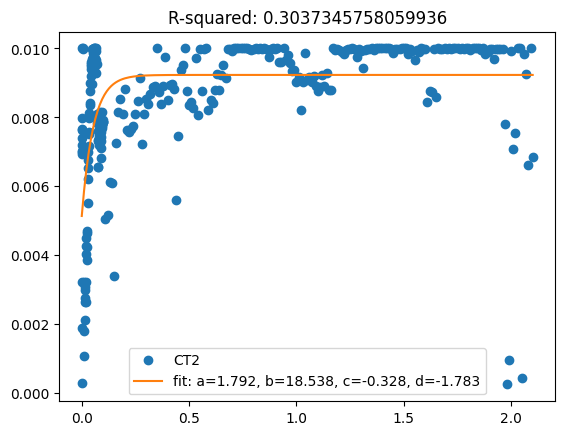

In [ ]:
cT2 = data["C2"].to_numpy()
initial_guess = [6.0, 18.0, 0.4, -6.0]
bounds = ([0, 0, -1, -10], [10, 30, 1, 0]) 

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT2 - cT2_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

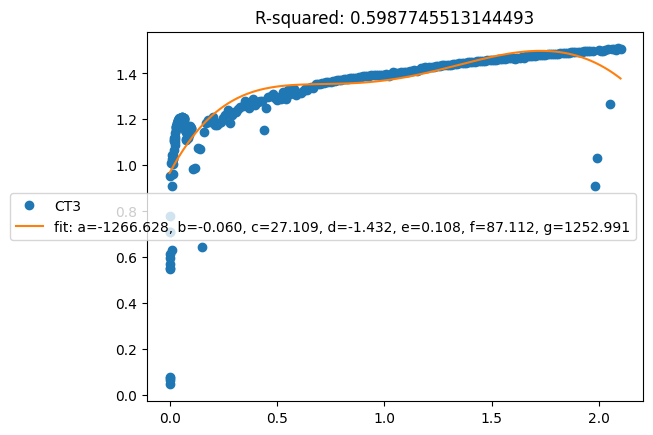

In [ ]:
cT3 = data["C3"].to_numpy()

params = curve_fit(cT3_func, PEEQ, cT3, p0=[65, 0.001, 0.6, 250, 0.02, -18, 0.12], maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

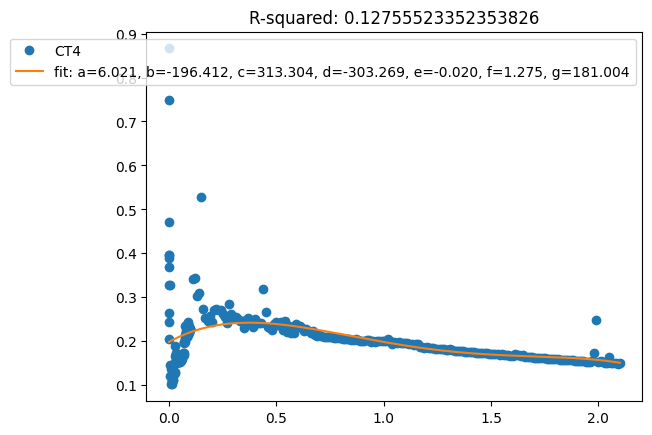

In [ ]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

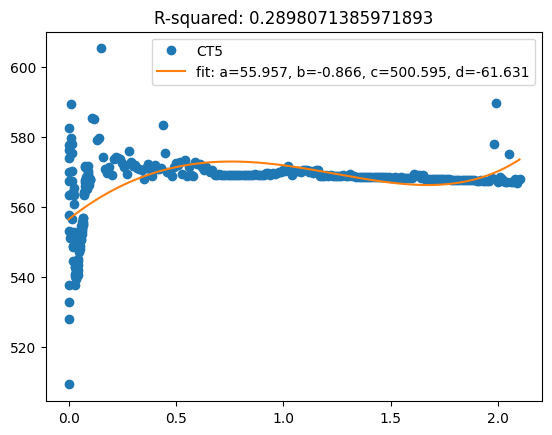

In [ ]:
cT5 = data["C5"].to_numpy()
initial_guess = [80, 0.5, 480, 0]

params = curve_fit(cT5_func, PEEQ, cT5,p0= initial_guess, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\1665829902.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)


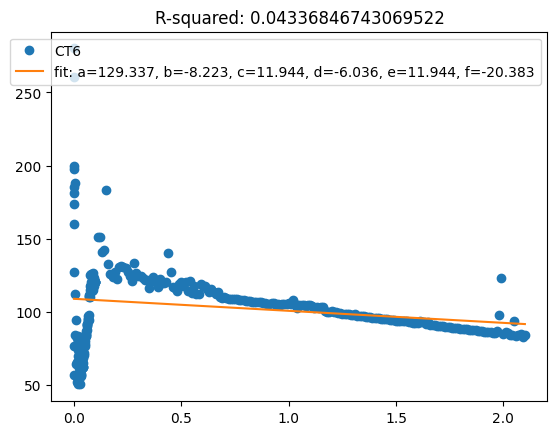

In [ ]:
cT6 = data["C6"].to_numpy()

params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)
[a, b, c, d, e, f] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [ ]:
df_para_fit.to_csv('para_fit_results_0.01.csv', index=False)

In [ ]:
stress_data = pd.read_csv("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/Temperature_calibration/Fitted_FC_TmpDpn_RD_StrRt0.01_ref.csv")
fitted_para = pd.read_csv("para_fit_results_0.01.csv")

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\1321266686.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


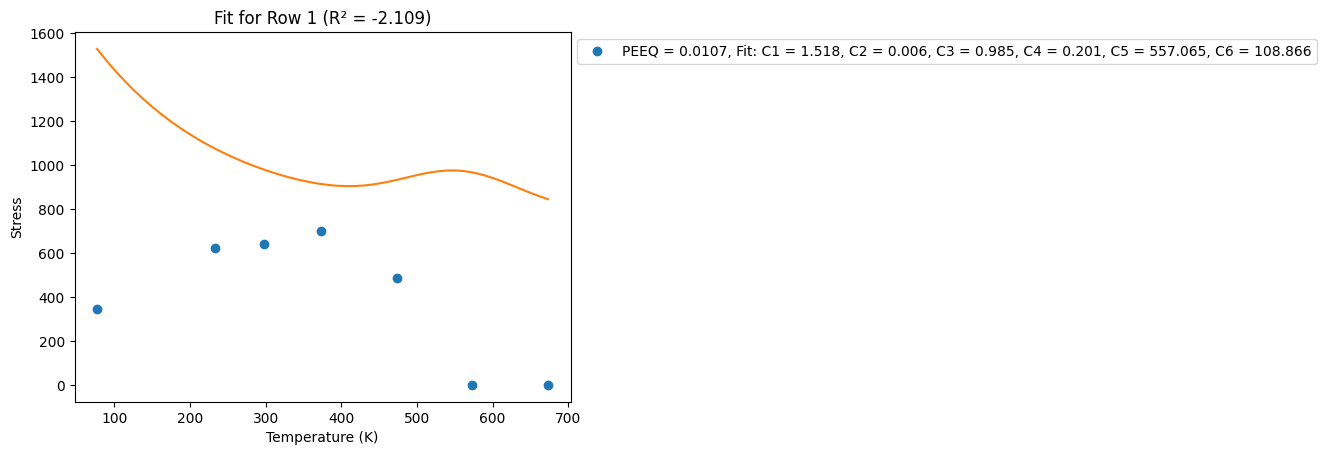

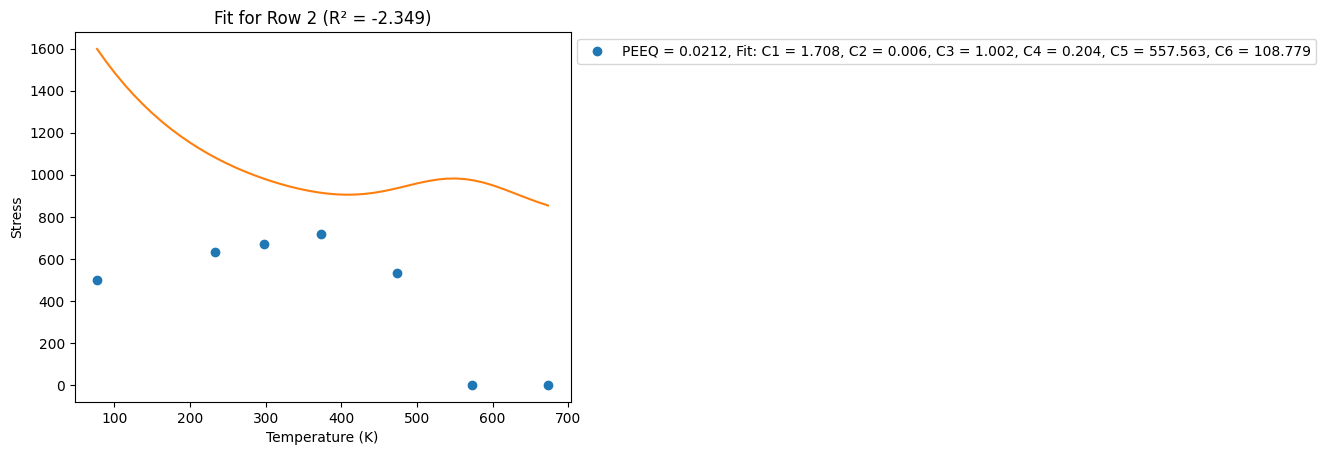

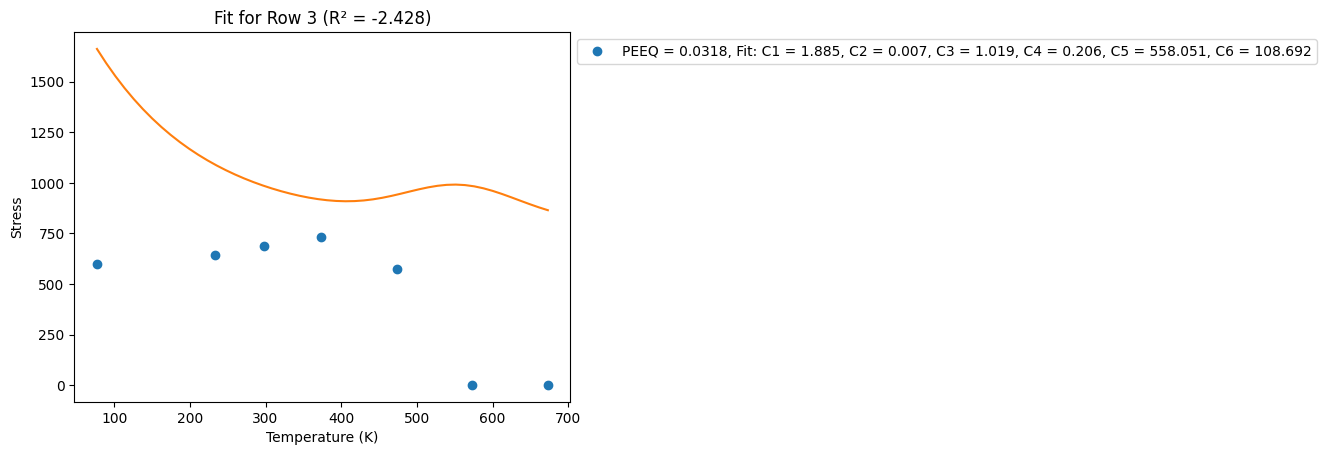

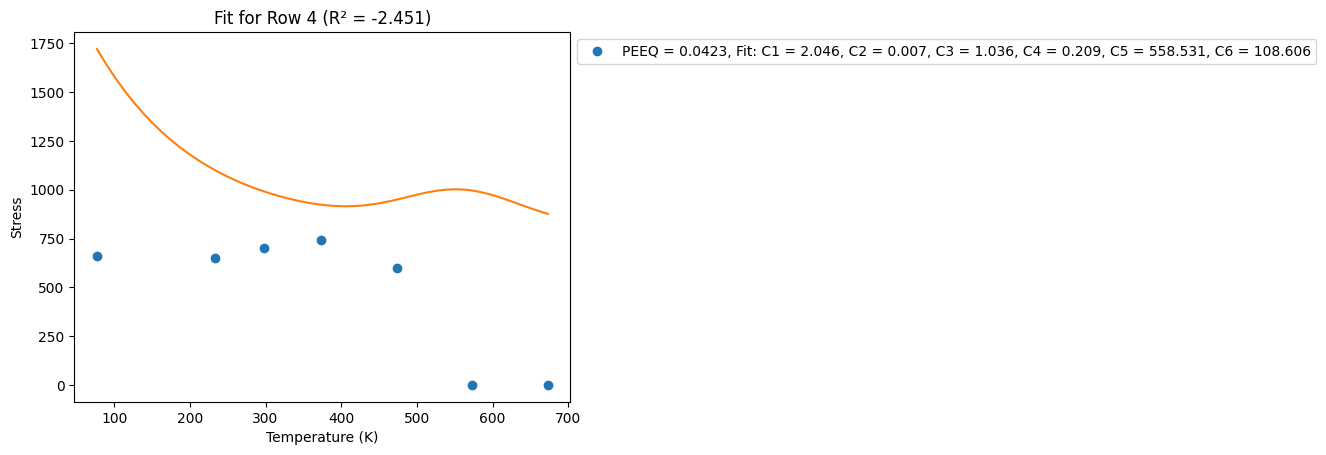

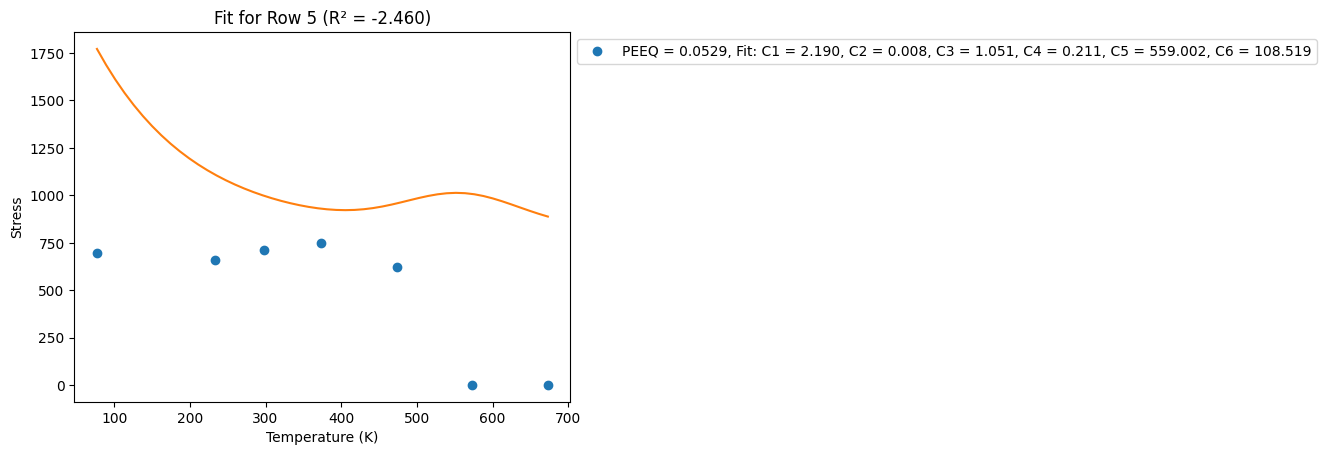

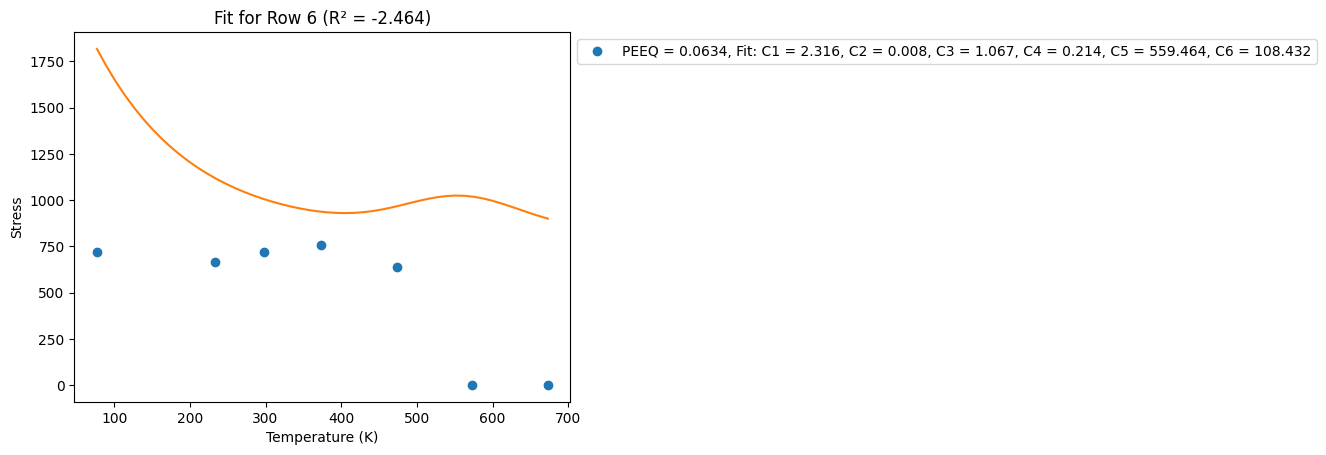

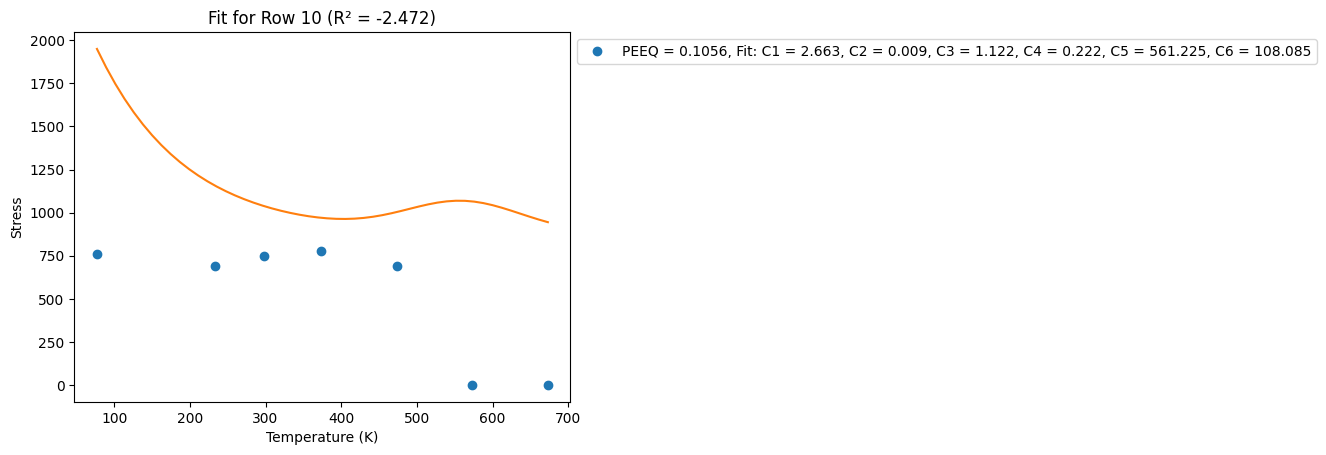

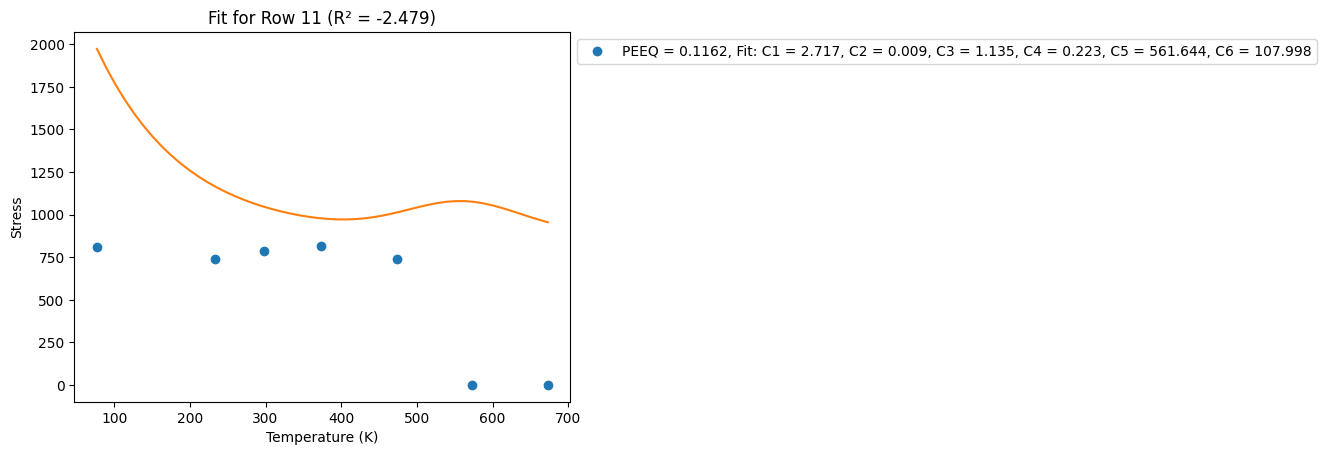

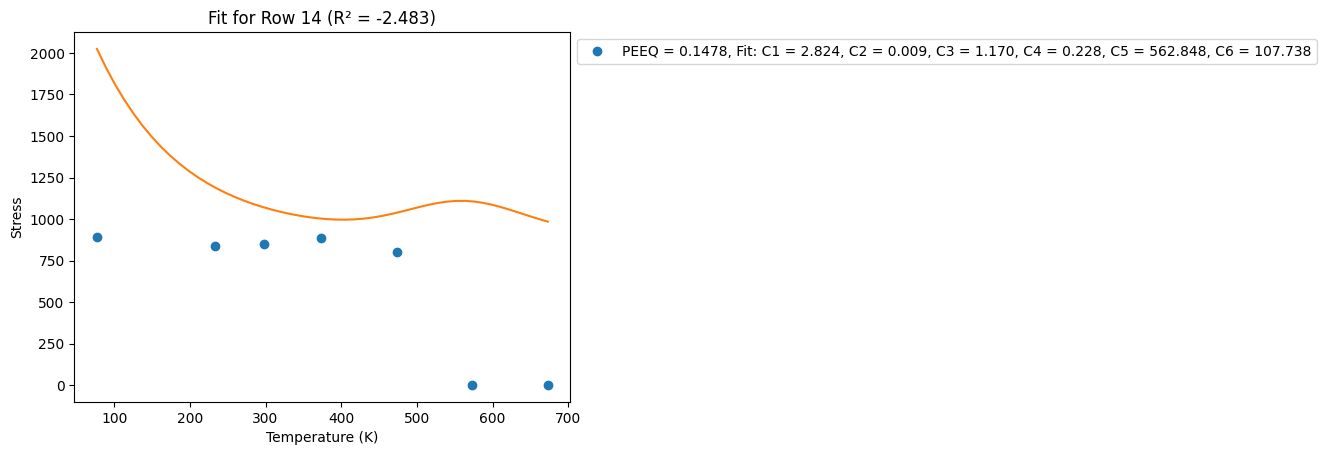

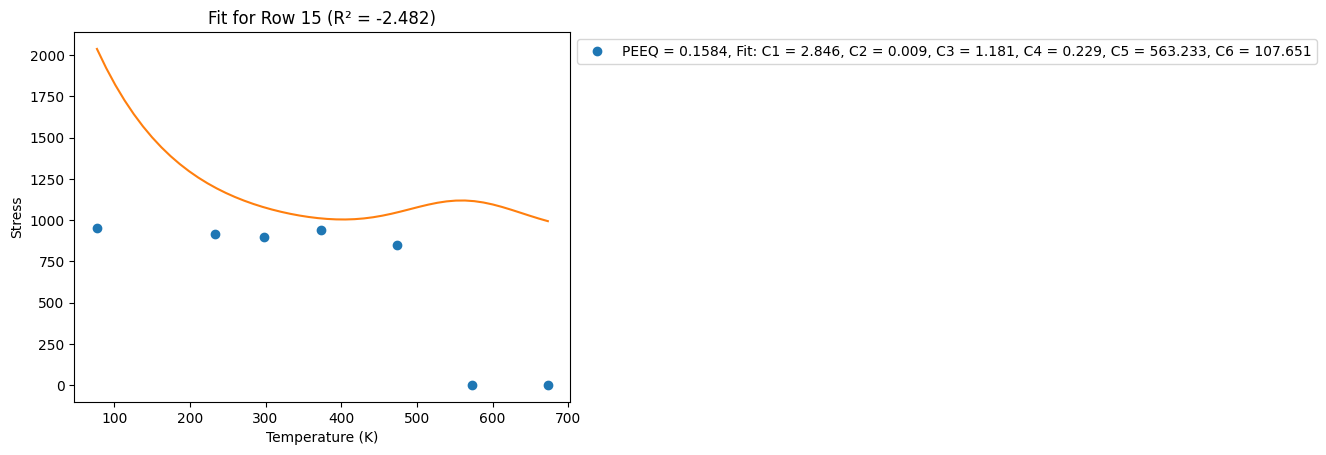

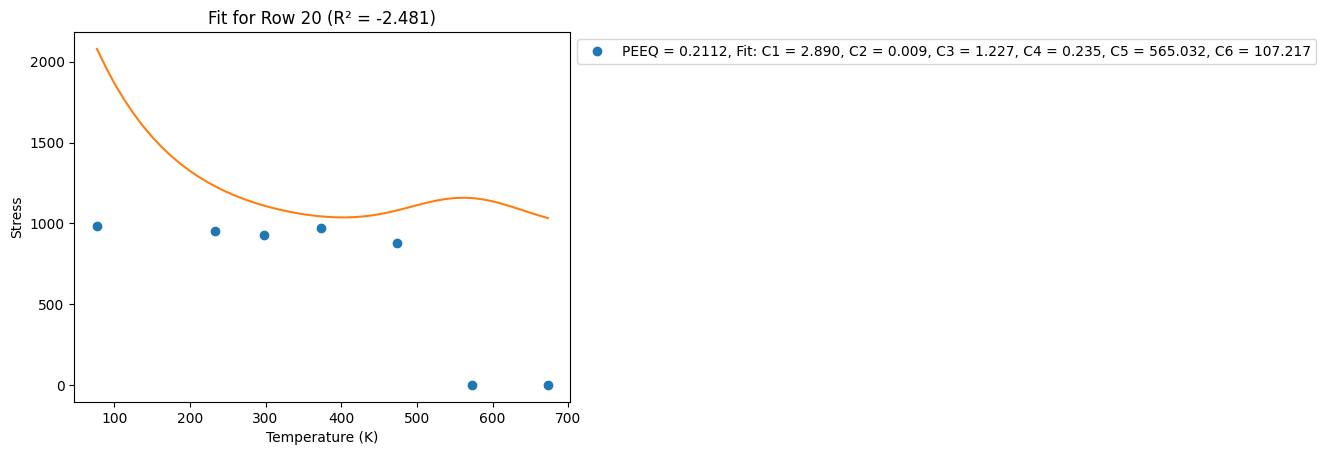

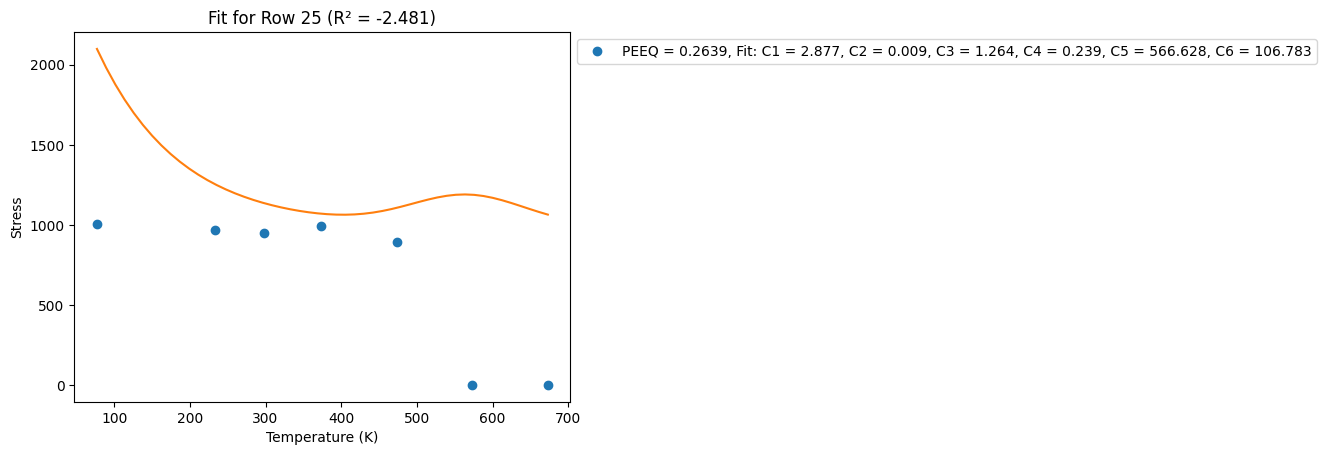

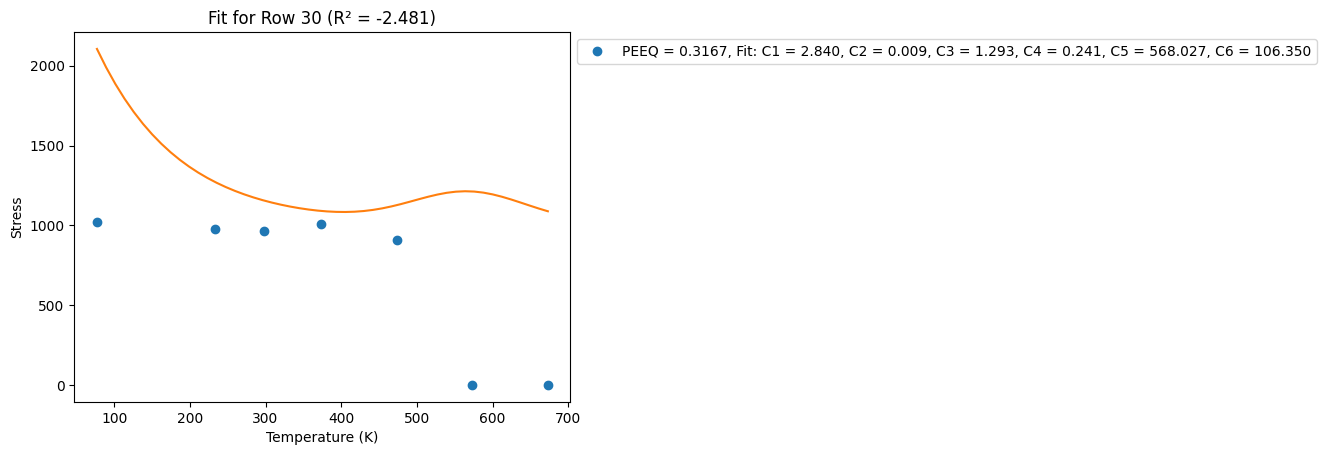

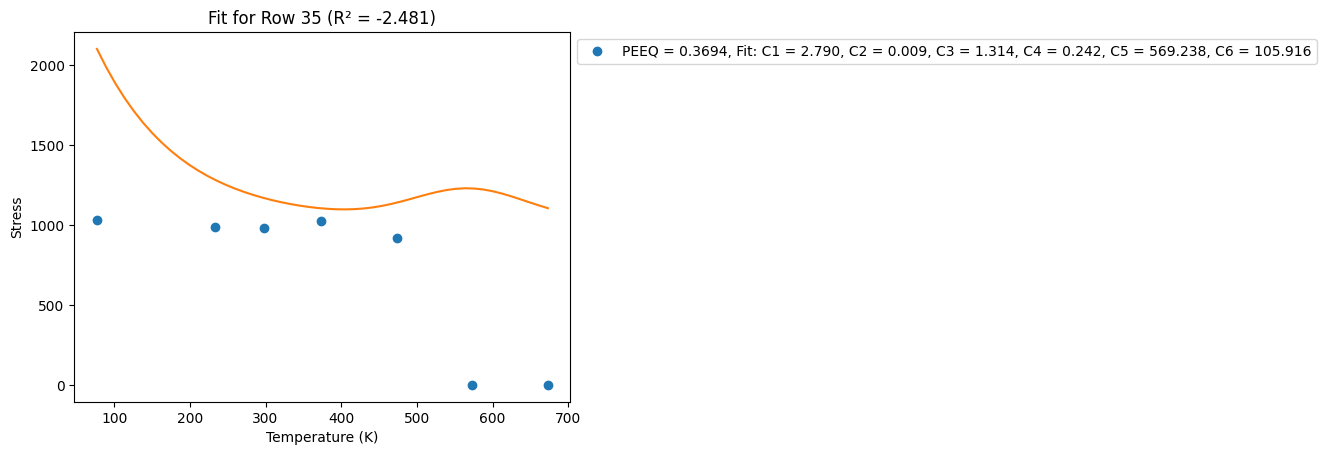

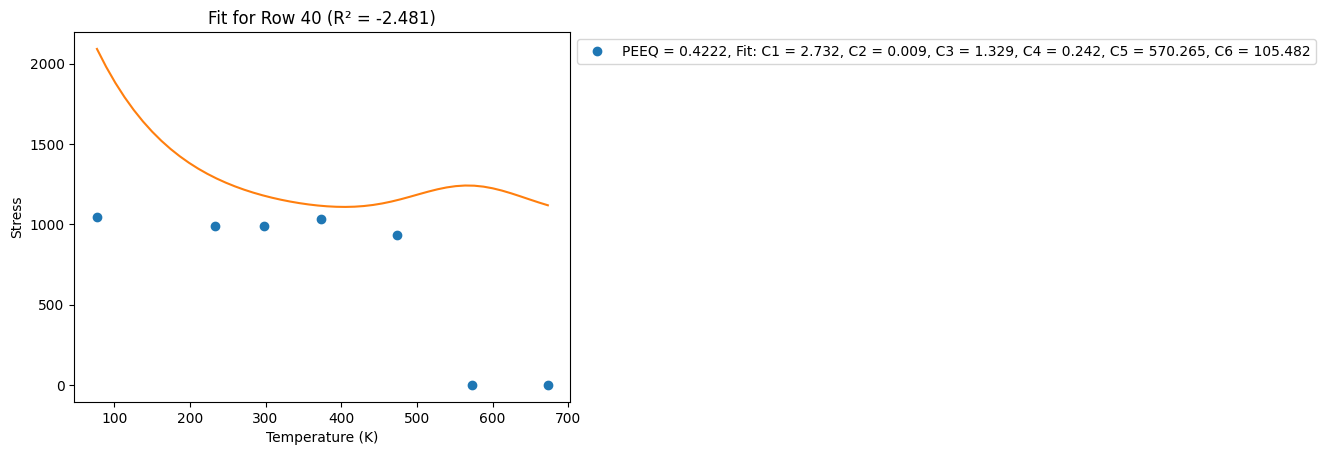

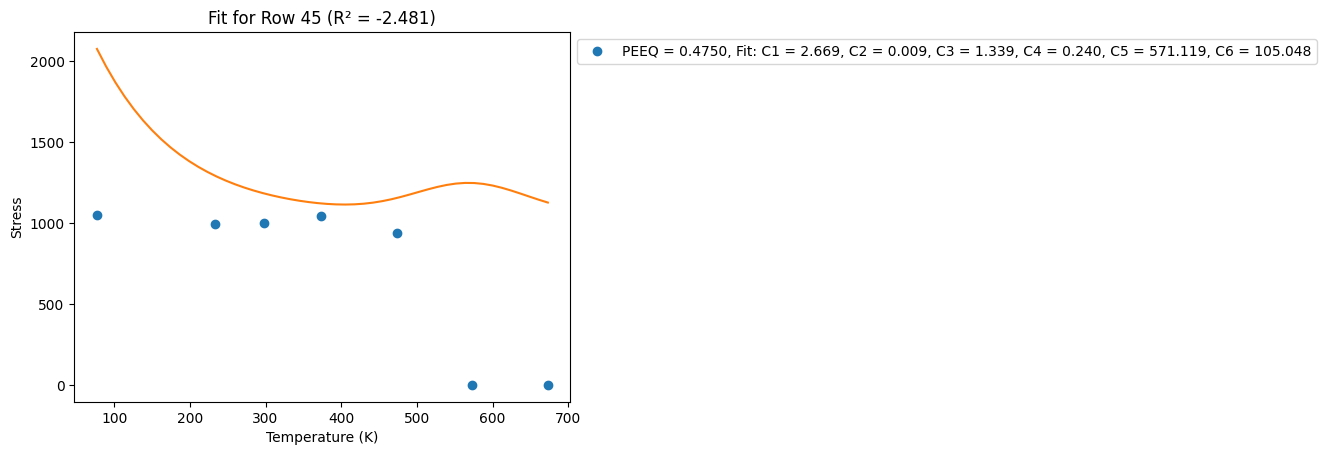

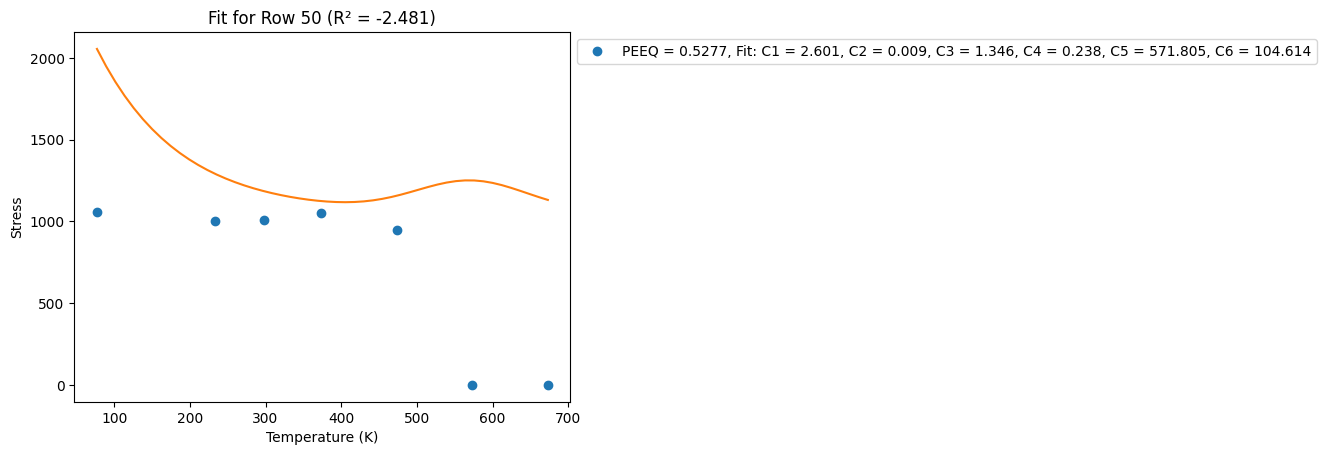

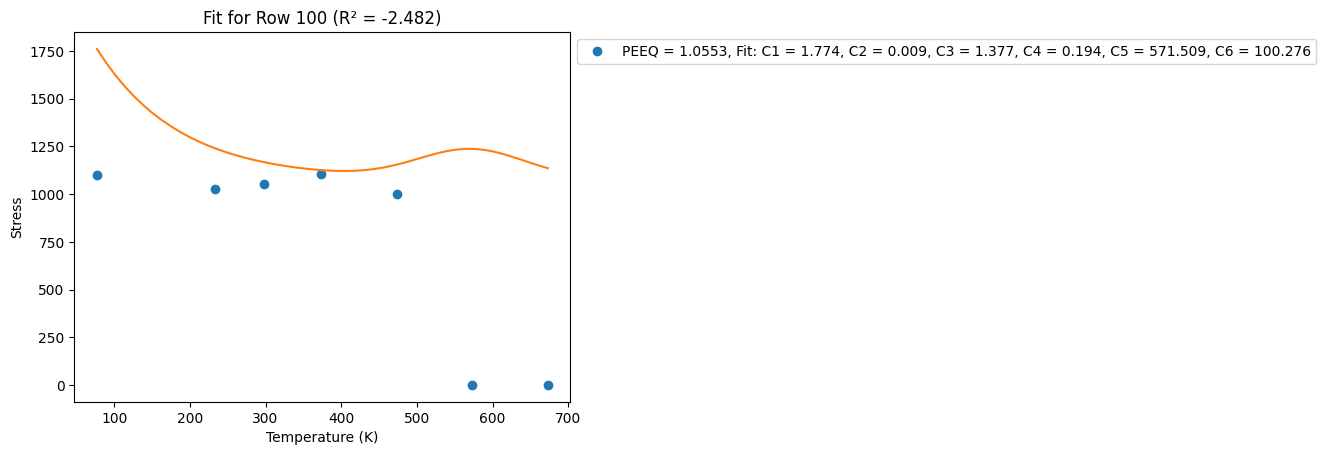

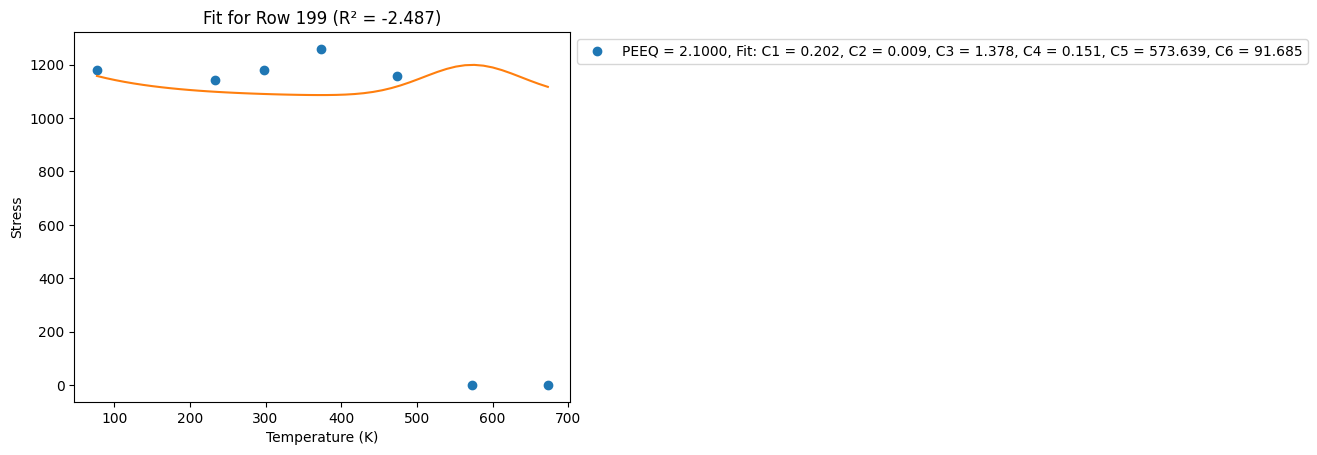

In [ ]:
for j, i in enumerate(np.array([1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

StrRt0.1

In [ ]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.1.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

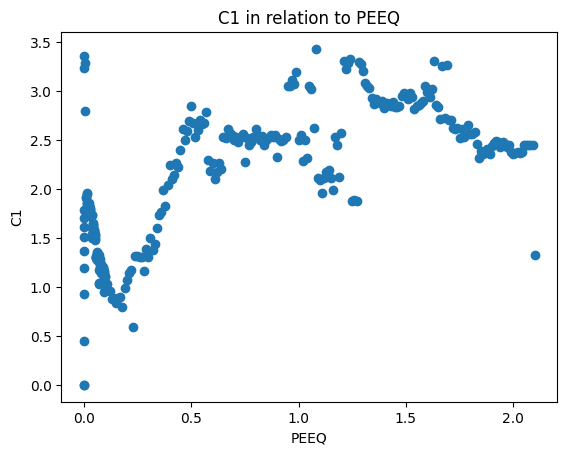

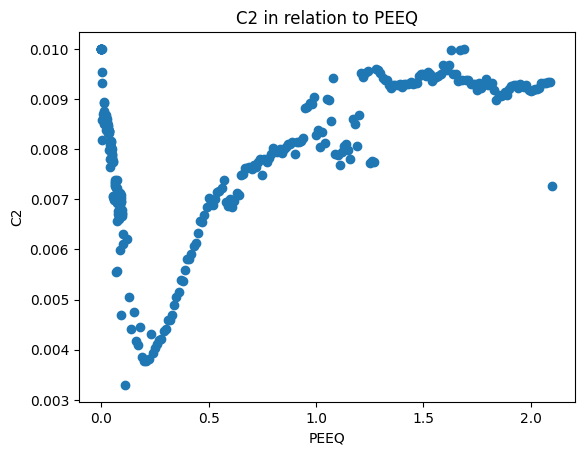

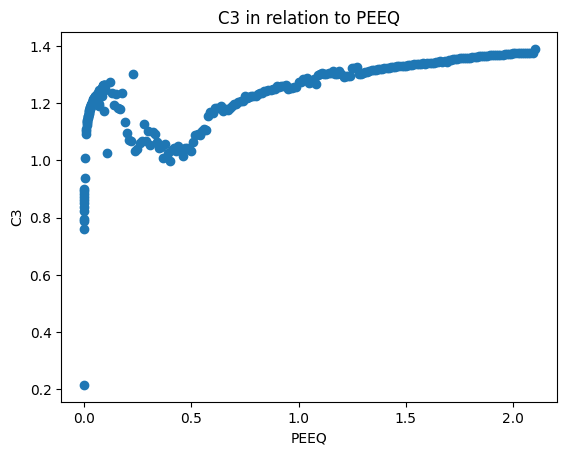

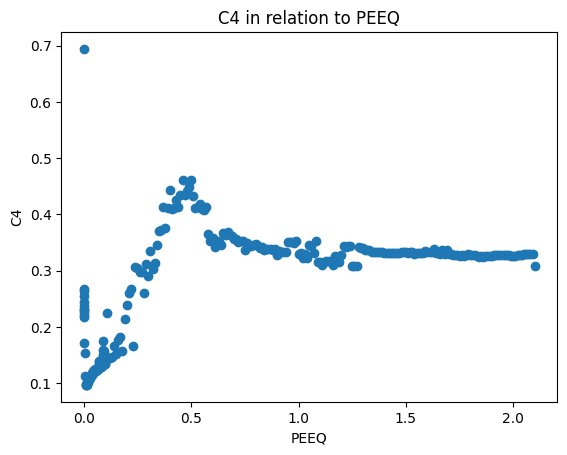

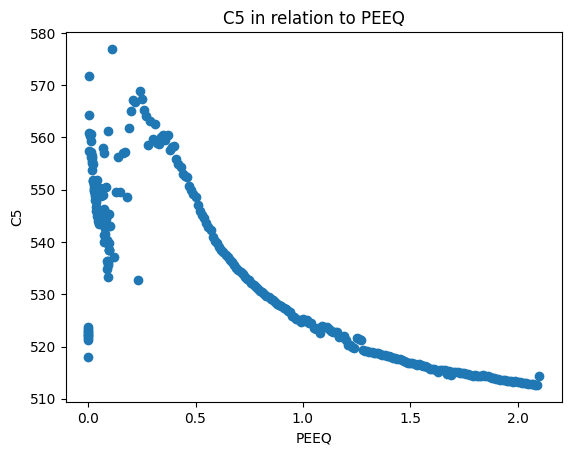

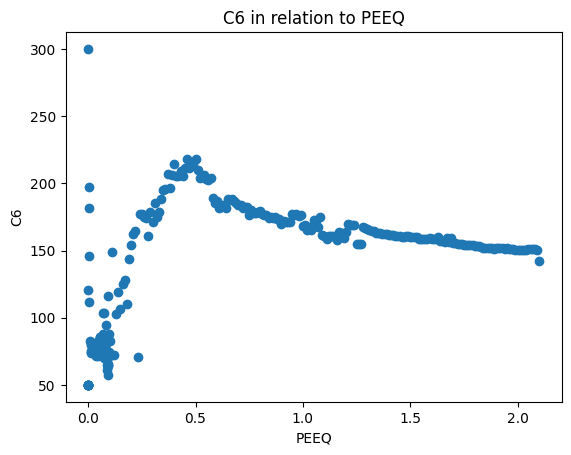

In [ ]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column],'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()


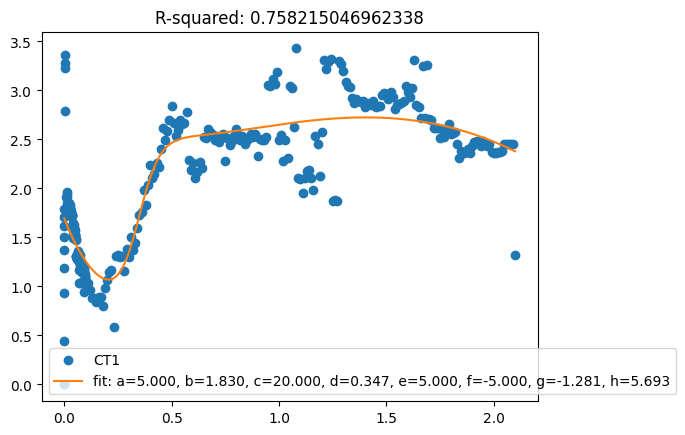

In [ ]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
initial_guesses = [1.0, 1.0, 5.0, 1.0, 0.5, 1.0, 0.1, 1.0]
param_bounds = ([0.1, -10, 0.1, -5, -5, -5, -5, -10],
                [5, 10, 20, 5, 5, 5, 5, 10])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guesses, bounds=param_bounds, maxfev = 1000000)
[a, b, c, d, e, f, g ,h] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

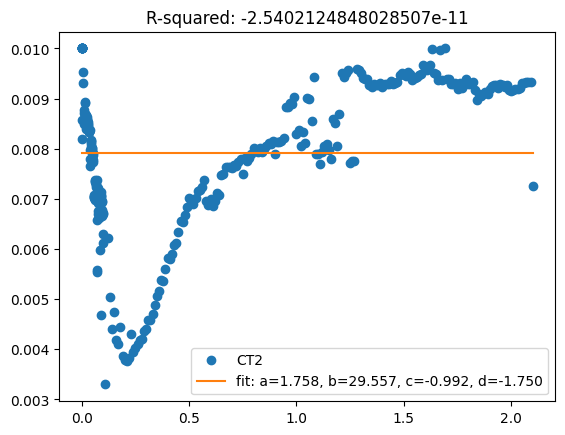

In [ ]:
cT2 = data["C2"].to_numpy()
initial_guess = [6.0, 18.0, 0.4, -6.0]
bounds = ([0, 0, -1, -10], [10, 30, 1, 0]) 

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT2 - cT2_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

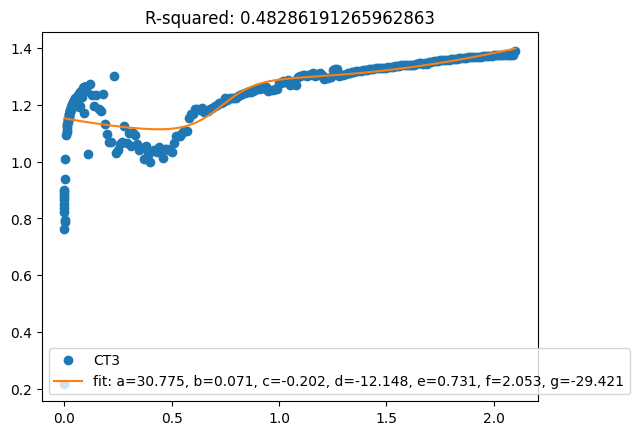

In [ ]:
cT3 = data["C3"].to_numpy()

params = curve_fit(cT3_func, PEEQ, cT3, p0=[65, 0.001, 0.6, 250, 0.02, -18, 0.12], maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

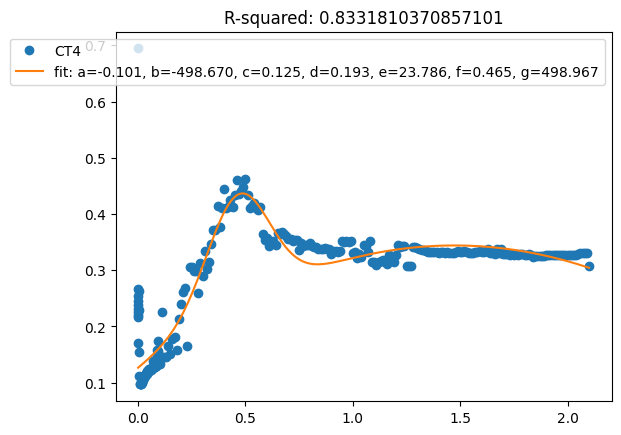

In [ ]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

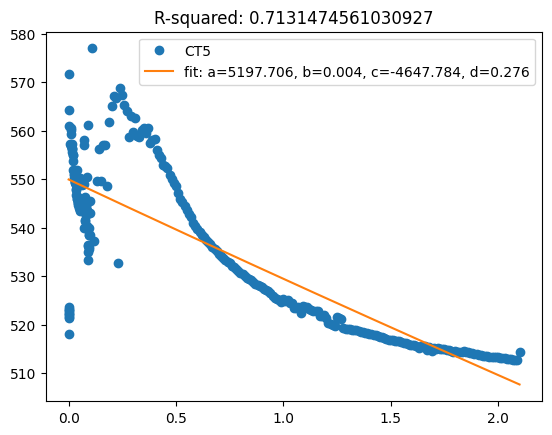

In [ ]:
cT5 = data["C5"].to_numpy()
initial_guess = [80, 0.5, 480, 0]

params = curve_fit(cT5_func, PEEQ, cT5,p0= initial_guess, maxfev = 1000000)
[a, b, c, d] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\1665829902.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)


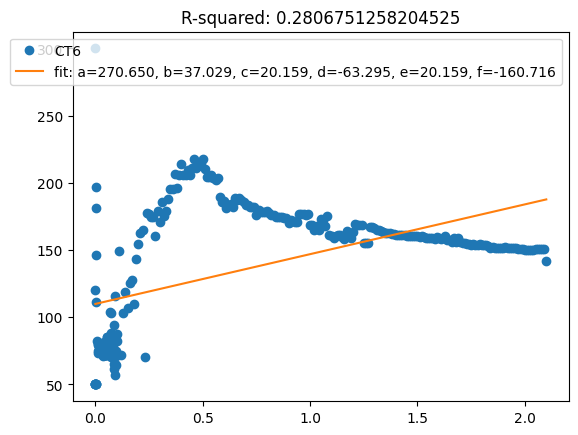

In [ ]:
cT6 = data["C6"].to_numpy()

params = curve_fit(cT6_func, PEEQ, cT6, maxfev = 1000000)
[a, b, c, d, e, f] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d, e, f)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d, e, f)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.title(f'R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [ ]:
df_para_fit.to_csv('para_fit_results_0.1.csv', index=False)

In [ ]:
stress_data = pd.read_csv("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/Temperature_calibration/Fitted_FC_TmpDpn_RD_StrRt0.1_ref.csv")
fitted_para = pd.read_csv("para_fit_results_0.1.csv")

C:\Users\meian\AppData\Local\Temp\ipykernel_4040\1321266686.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


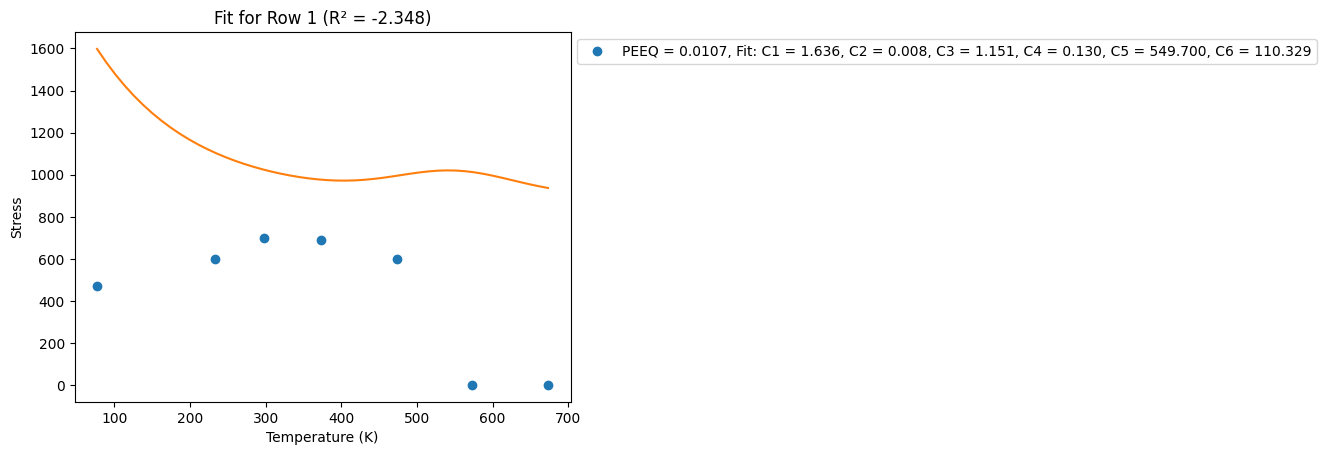

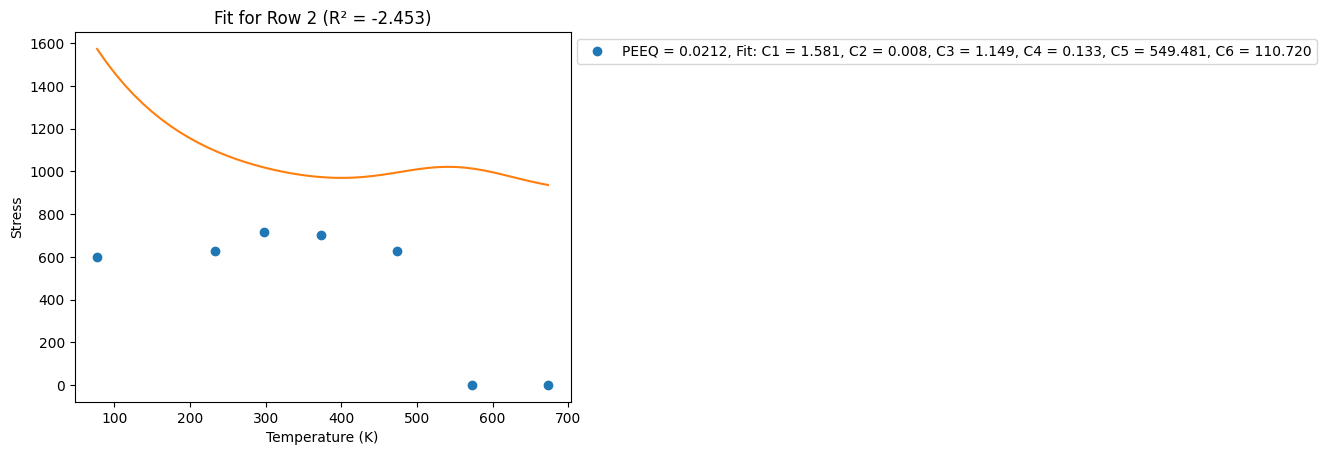

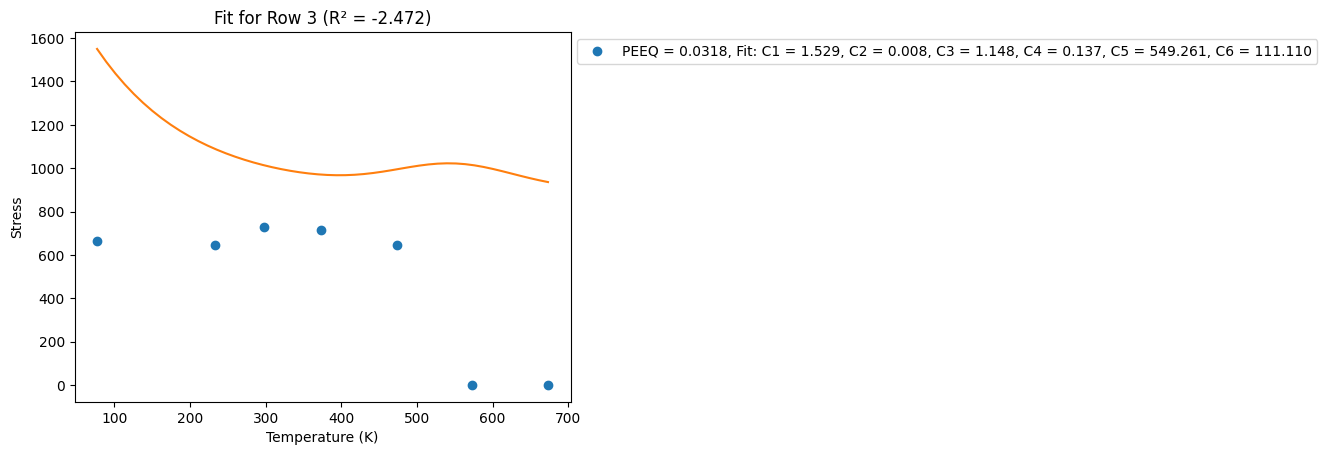

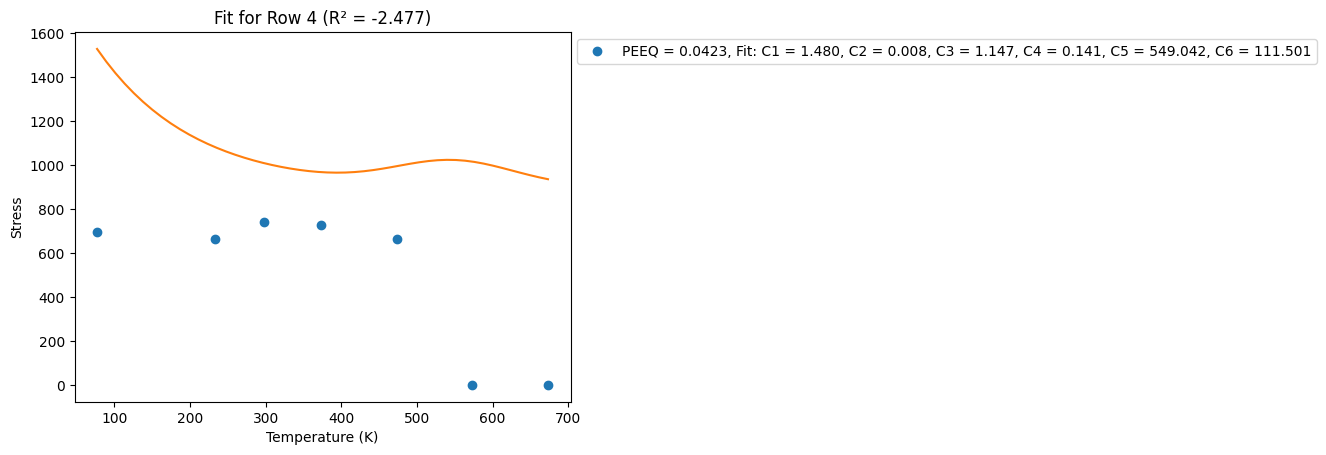

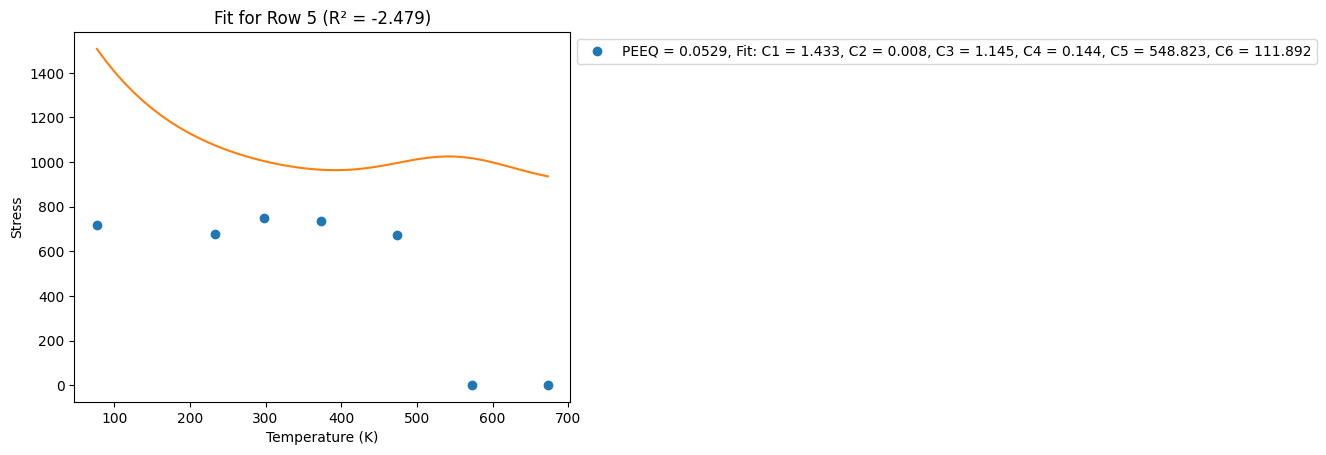

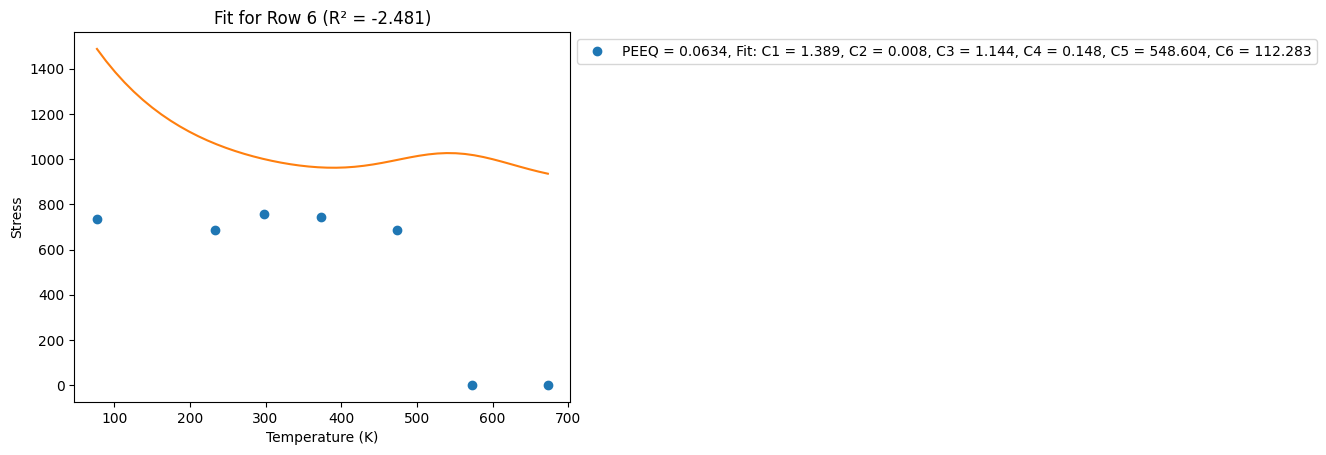

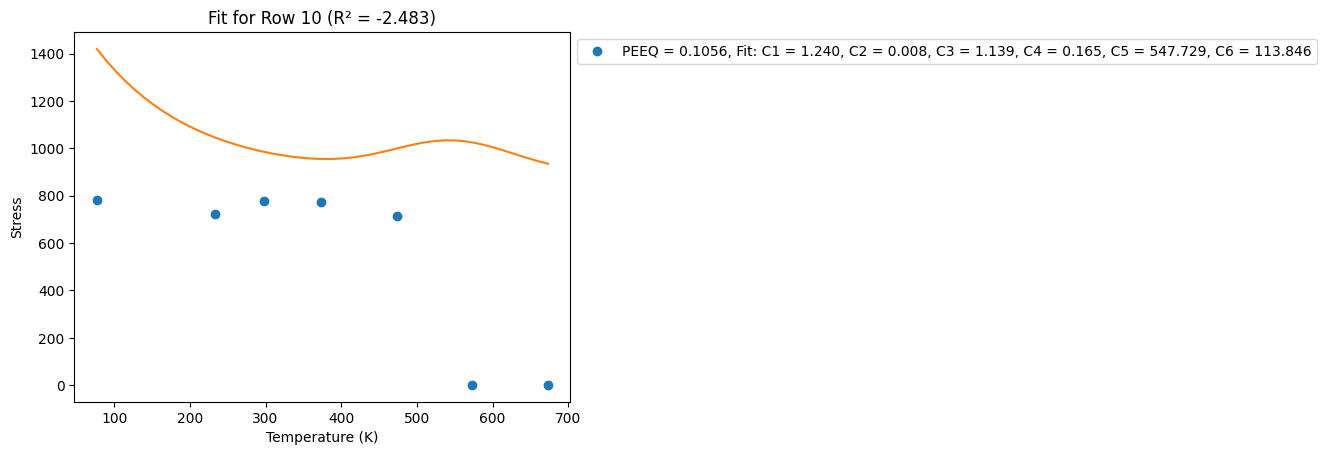

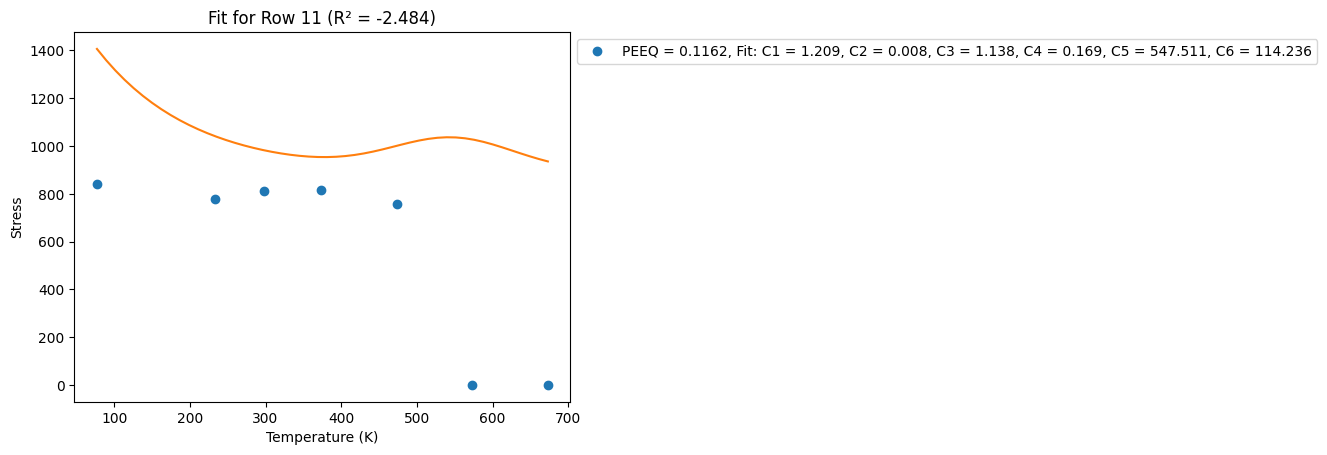

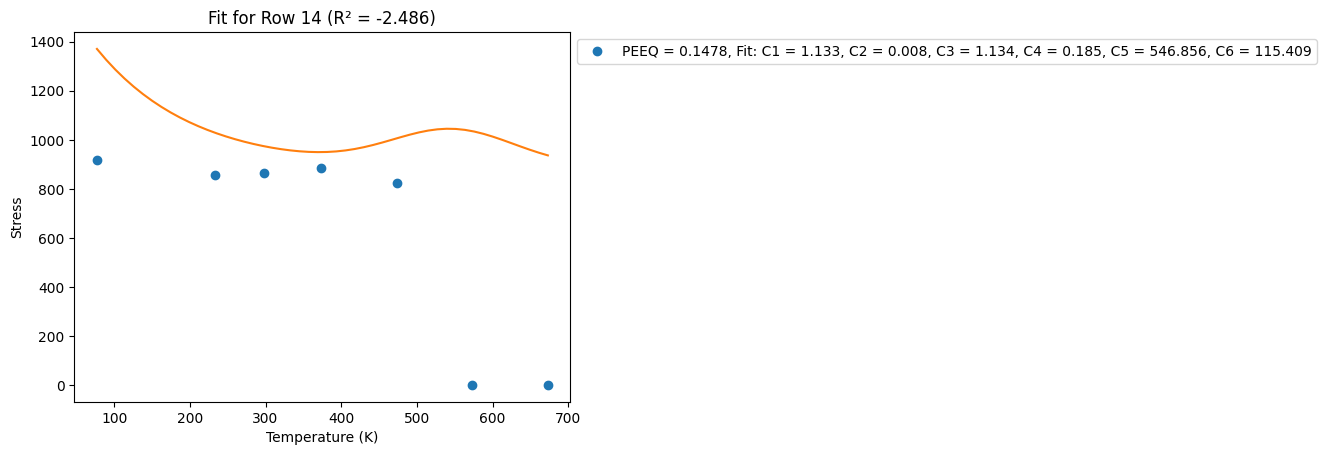

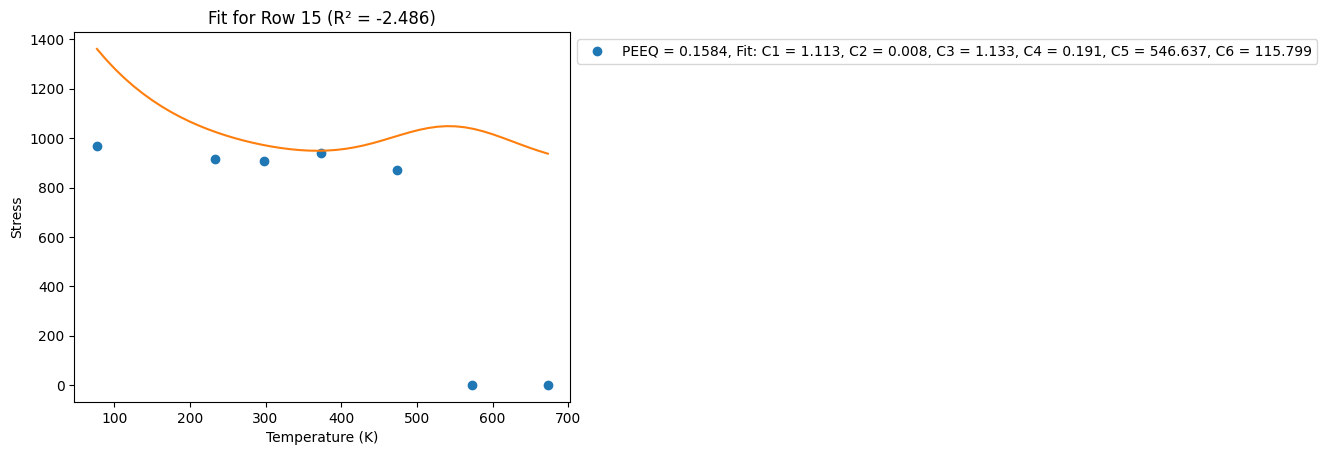

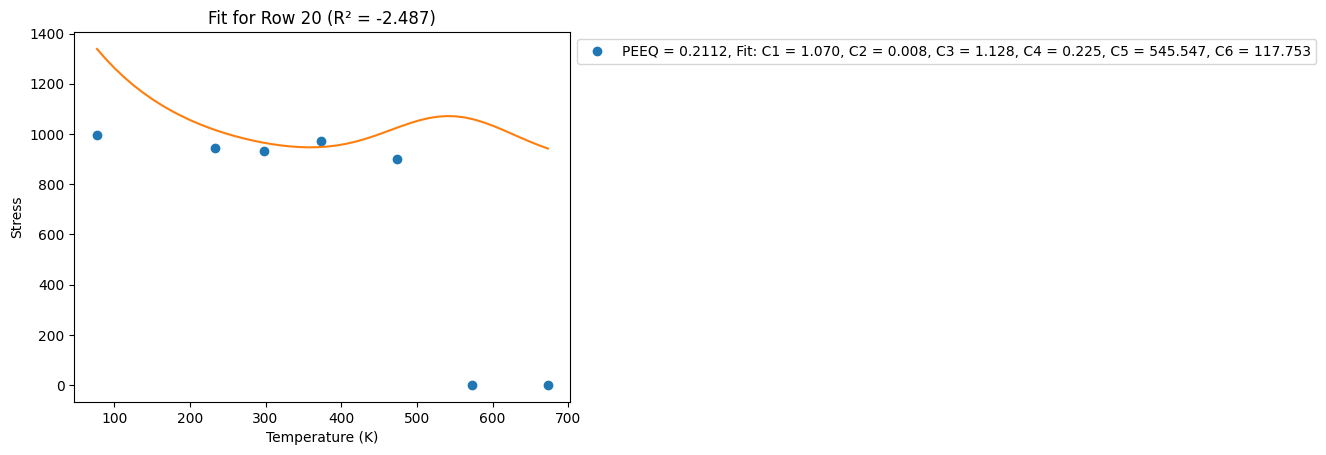

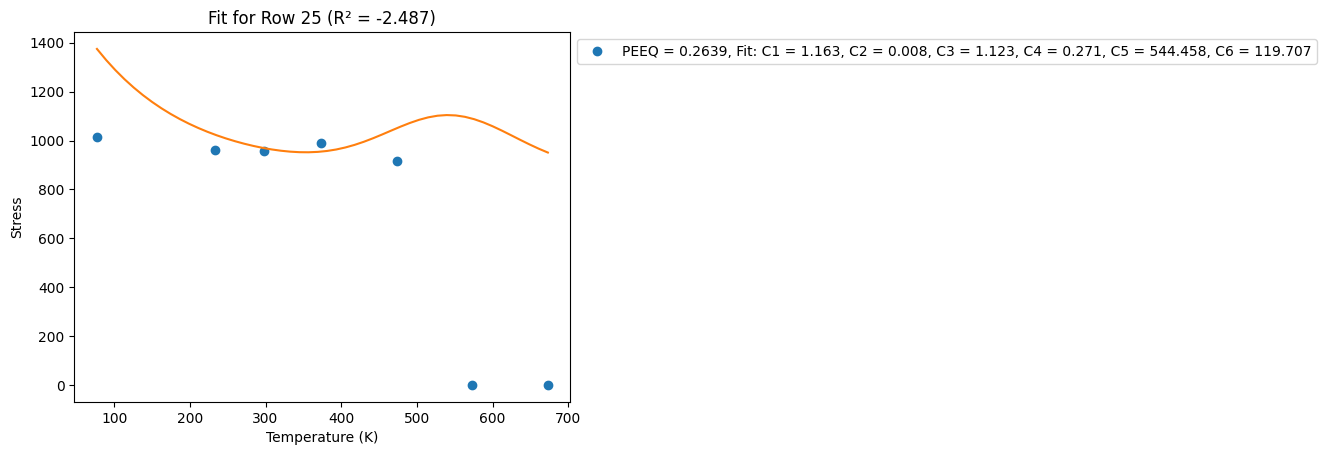

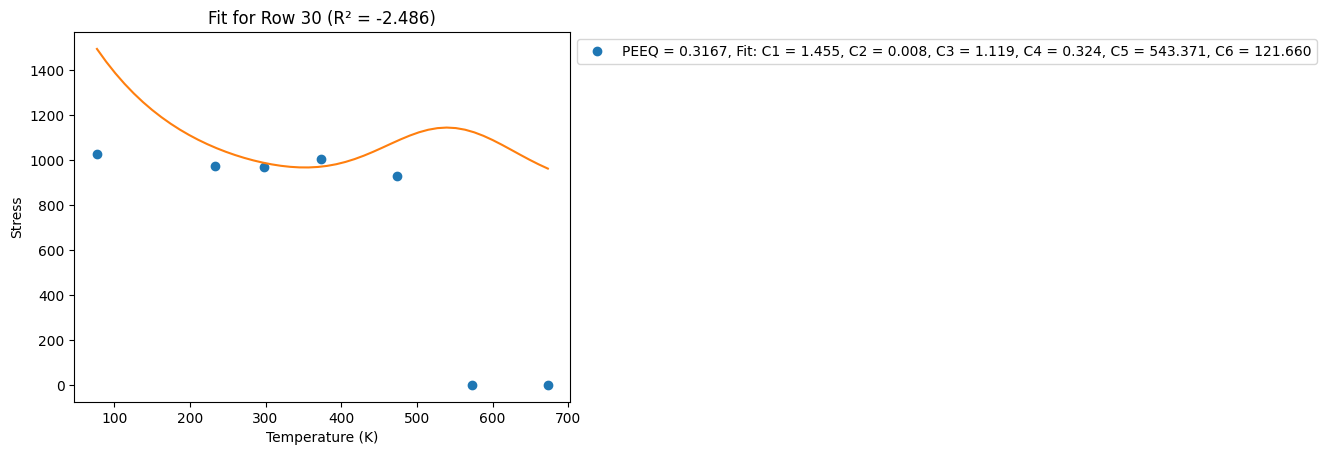

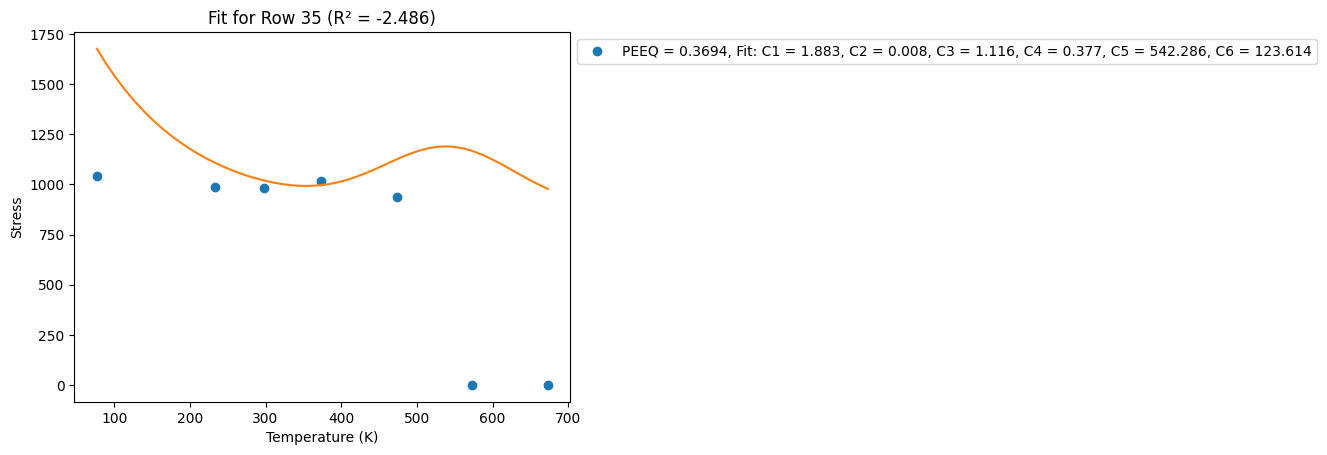

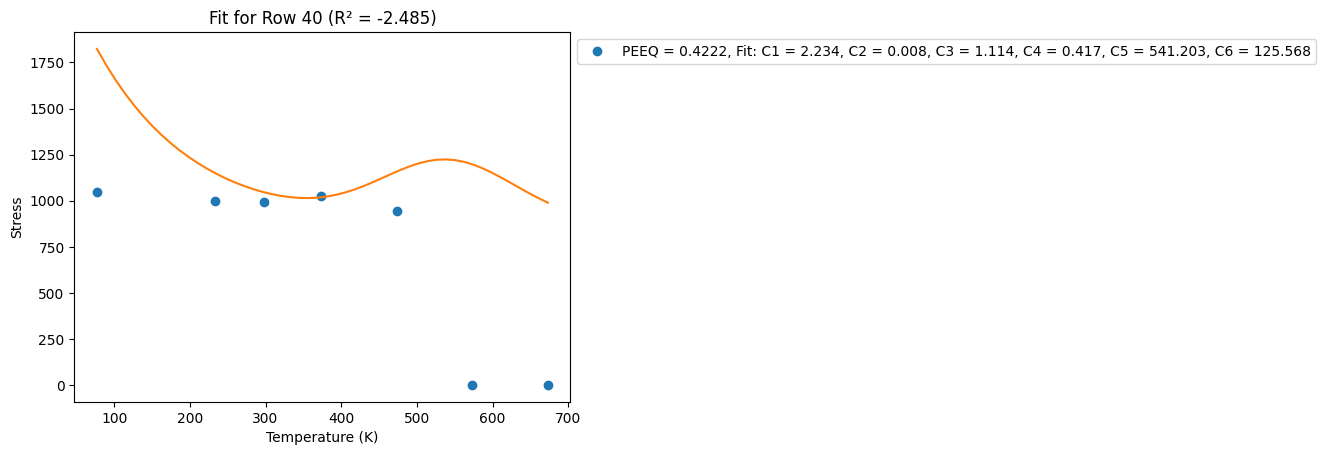

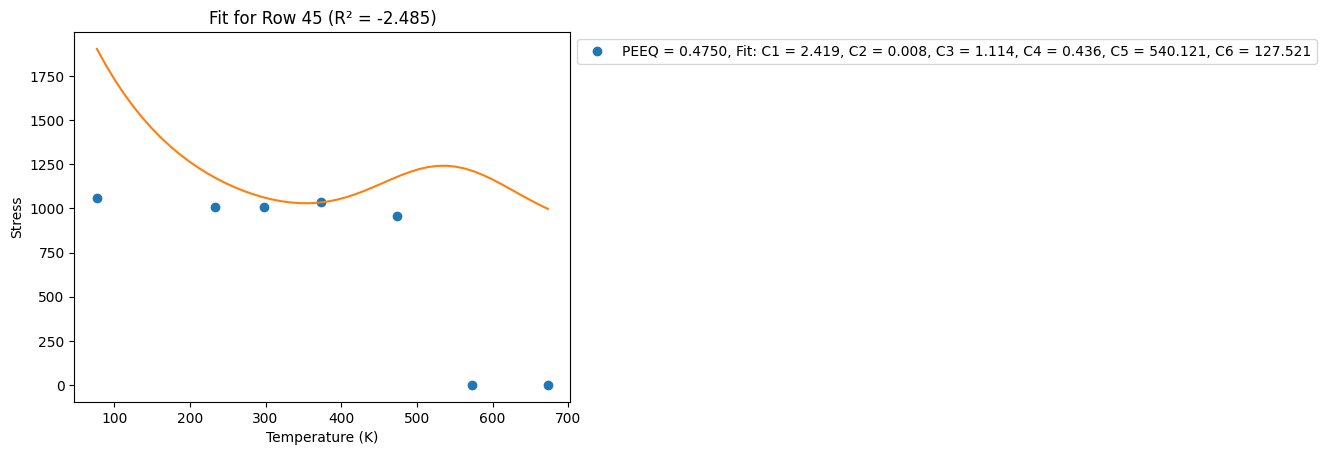

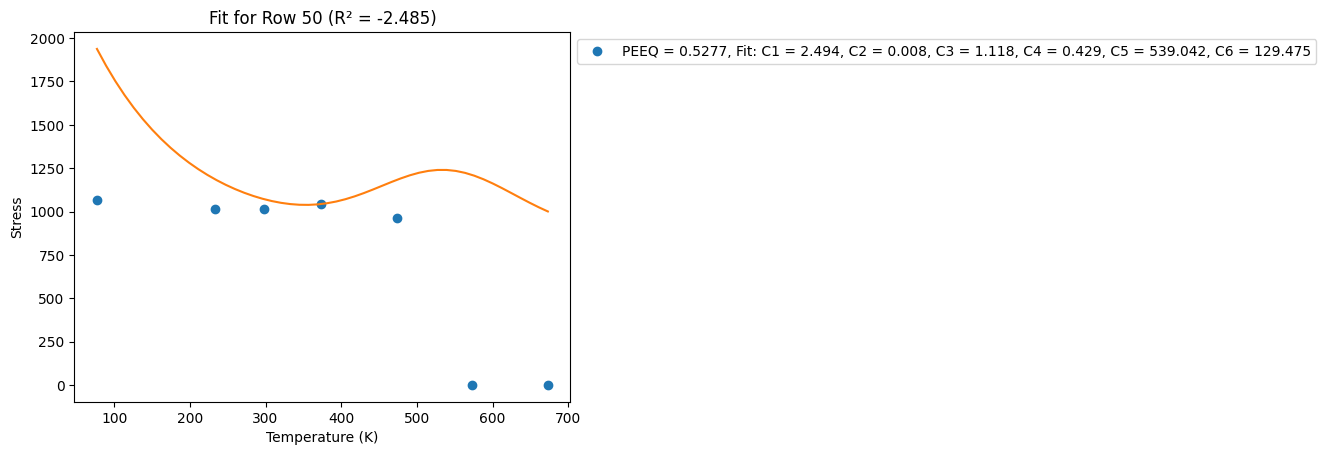

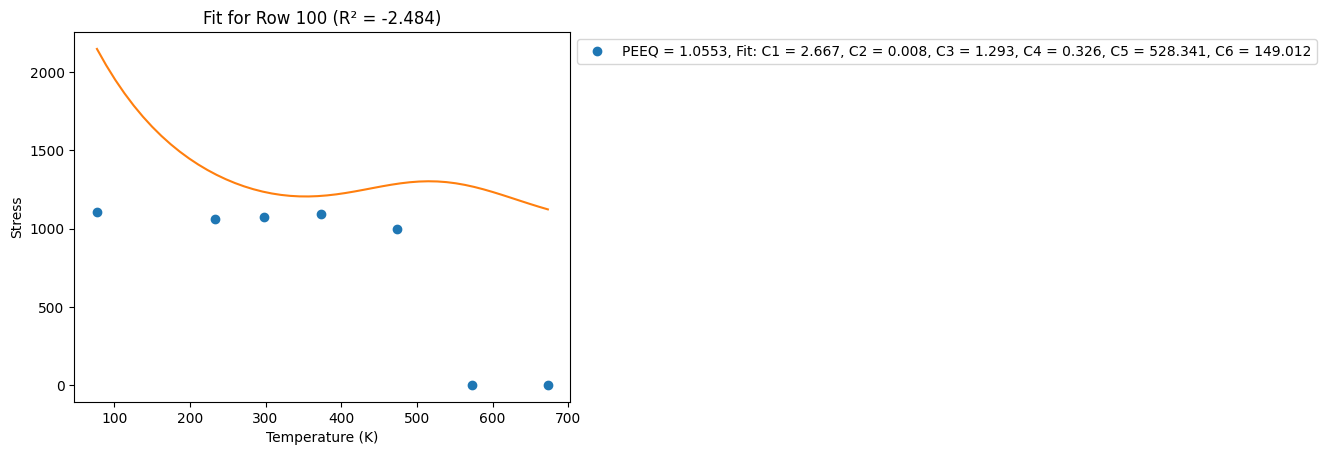

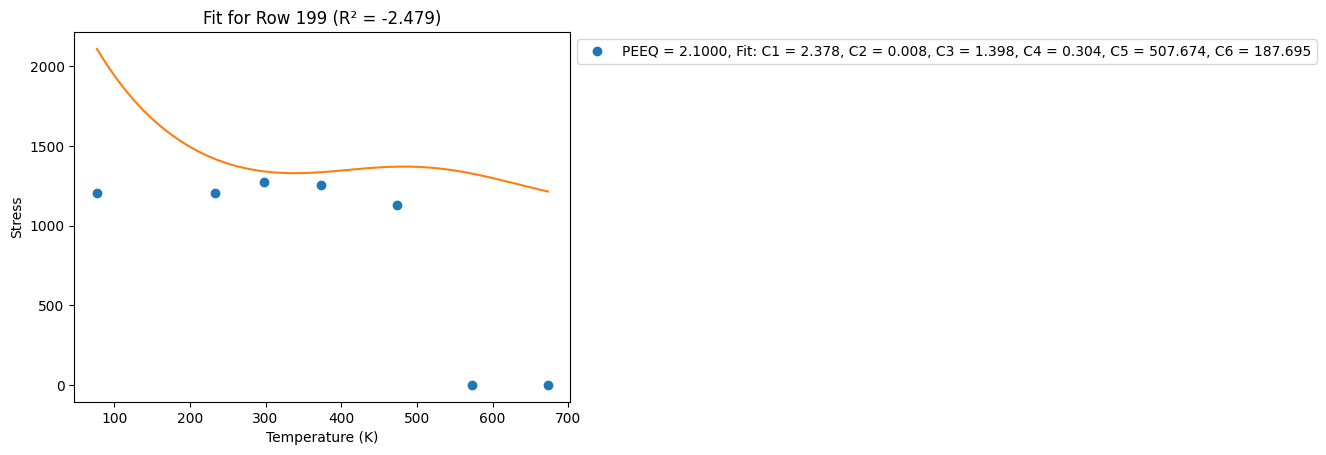

In [ ]:
for j, i in enumerate(np.array([1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)